P-values for SIDS_or_LDC vs Non-SIDS_or_LDC:
{'Non-Growth': 0.002735048273958672, 'Green-Growth Critical': 0.04988191225933431}
Adjusted P-values for SIDS_or_LDC vs Non-SIDS_or_LDC:
{'Non-Growth': 0.005470096547917344, 'Green-Growth Critical': 0.09976382451866862}


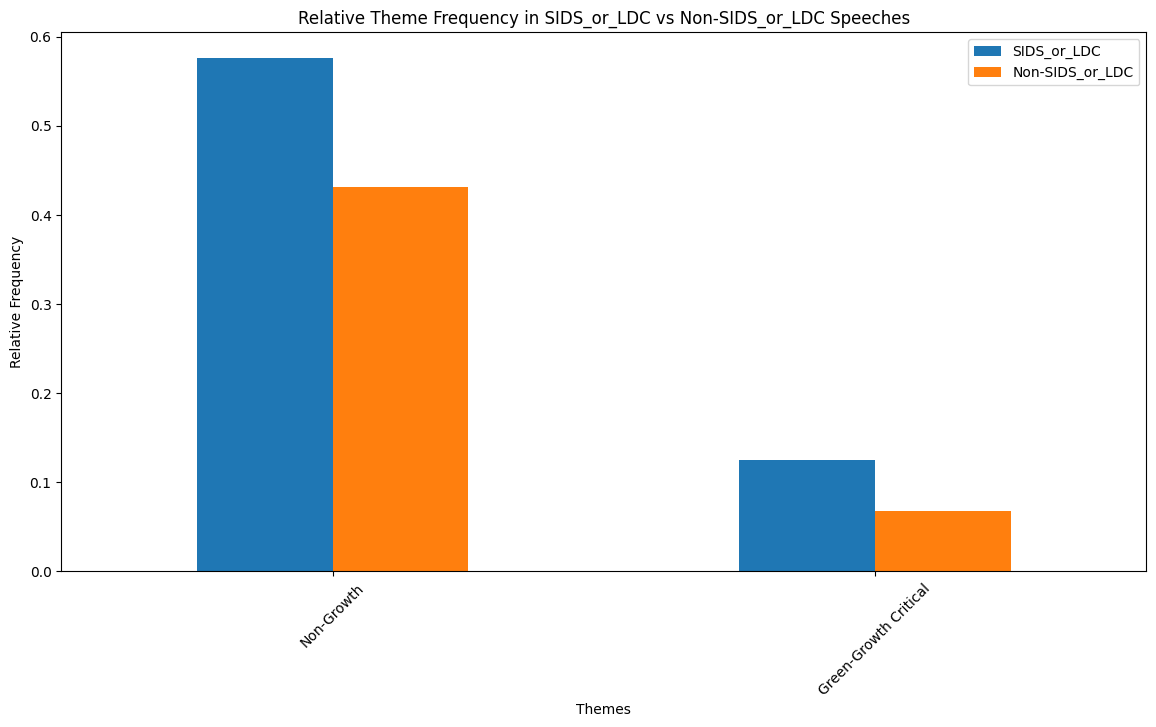

In [10]:
import pandas as pd

# Load the dataset
df = pd.read_csv('analysisdataset.csv')

# Create a new column 'SIDS_or_LDC' to combine SIDS and LDC
df['SIDS_or_LDC'] = df.apply(lambda row: 'Yes' if row['SIDS'] == 'Yes' or row['LDC'] == 'Yes' else 'No', axis=1)

# Split the Theme_Combined column and create a long-format dataframe
df_themes = df.assign(Theme_Combined=df['Theme_Combined'].str.split()).explode('Theme_Combined')

# Ensure correct mapping of themes to their full names
theme_mapping = {
    'S_Int': 'Strong International',
    'S_Reg': 'Strong Regional',
    'S_Dom': 'Strong Domestic',
    'W_Int': 'Weak International',
    'W_Reg': 'Weak Regional',
    'W_Dom': 'Weak Domestic',
    'AG': 'Green-Growth Critical',
    'NG': 'Non-Growth'
}
df_themes['Theme_Combined'] = df_themes['Theme_Combined'].map(theme_mapping)

# Calculate the number of speeches in each group
num_speeches_sids_or_ldc = df[df['SIDS_or_LDC'] == 'Yes'].shape[0]
num_speeches_non_sids_or_ldc = df[df['SIDS_or_LDC'] == 'No'].shape[0]

# Calculate the relative frequency of each theme for SIDS_or_LDC and Non-SIDS_or_LDC
relative_freq_sids_or_ldc = df_themes[df_themes['SIDS_or_LDC'] == 'Yes']['Theme_Combined'].value_counts() / num_speeches_sids_or_ldc
relative_freq_non_sids_or_ldc = df_themes[df_themes['SIDS_or_LDC'] == 'No']['Theme_Combined'].value_counts() / num_speeches_non_sids_or_ldc

from scipy.stats import chi2_contingency

# Function to perform chi-square test for each theme
def chi_square_test(rel_freq_group1, rel_freq_group2):
    p_values = {}
    themes = set(rel_freq_group1.index).union(set(rel_freq_group2.index))
    for theme in themes:
        freq_group1 = rel_freq_group1.get(theme, 0) * num_speeches_sids_or_ldc
        freq_group2 = rel_freq_group2.get(theme, 0) * num_speeches_non_sids_or_ldc
        contingency_table = [[freq_group1, num_speeches_sids_or_ldc - freq_group1],
                             [freq_group2, num_speeches_non_sids_or_ldc - freq_group2]]
        _, p, _, _ = chi2_contingency(contingency_table)
        p_values[theme] = p
    return p_values

# Perform chi-square tests for themes
p_values = chi_square_test(relative_freq_sids_or_ldc, relative_freq_non_sids_or_ldc)
print("P-values for SIDS_or_LDC vs Non-SIDS_or_LDC:")
print(p_values)

from statsmodels.stats.multitest import multipletests

# Adjust p-values for multiple comparisons
_, p_adjusted, _, _ = multipletests(list(p_values.values()), method='bonferroni')
p_adjusted = dict(zip(p_values.keys(), p_adjusted))

print("Adjusted P-values for SIDS_or_LDC vs Non-SIDS_or_LDC:")
print(p_adjusted)

import matplotlib.pyplot as plt
import seaborn as sns

# Combine data into a single dataframe for plotting
relative_freq_df = pd.DataFrame({
    'Theme': relative_freq_sids_or_ldc.index.union(relative_freq_non_sids_or_ldc.index),
    'Relative_Frequency_SIDS_or_LDC': relative_freq_sids_or_ldc,
    'Relative_Frequency_Non_SIDS_or_LDC': relative_freq_non_sids_or_ldc
}).fillna(0).set_index('Theme')

# Plotting relative theme frequencies
relative_freq_df.plot(kind='bar', figsize=(14, 7))
plt.title('Relative Theme Frequency in SIDS_or_LDC vs Non-SIDS_or_LDC Speeches')
plt.xlabel('Themes')
plt.ylabel('Relative Frequency')
plt.xticks(rotation=45)
plt.legend(['SIDS_or_LDC', 'Non-SIDS_or_LDC'])
plt.show()


P-values for SIDS_or_LDC vs Non-SIDS_or_LDC:
{'Non-Growth': 0.002735048273958672, 'Green-Growth Critical': 0.04988191225933431}
Adjusted P-values for SIDS_or_LDC vs Non-SIDS_or_LDC:
{'Non-Growth': 0.005470096547917344, 'Green-Growth Critical': 0.09976382451866862}


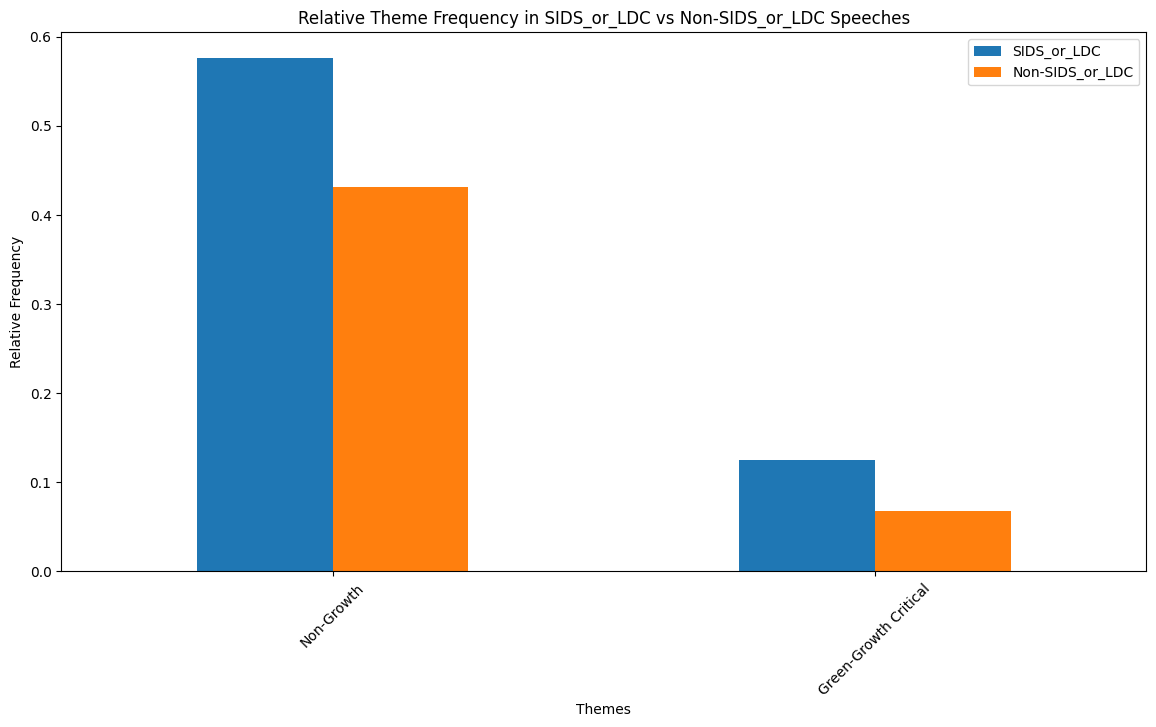

In [13]:
import pandas as pd

# Load the dataset
df = pd.read_csv('analysisdataset.csv')

# Create a new column 'SIDS_or_LDC' to combine SIDS and LDC
df['SIDS_or_LDC'] = df.apply(lambda row: 'Yes' if row['SIDS'] == 'Yes' or row['LDC'] == 'Yes' else 'No', axis=1)

# Split the Theme_Combined column and create a long-format dataframe
df_themes = df.assign(Theme_Combined=df['Theme_Combined'].str.split()).explode('Theme_Combined')

# Ensure correct mapping of themes to their full names
theme_mapping = {
    'S_Int': 'Strong International',
    'S_Reg': 'Strong Regional',
    'S_Dom': 'Strong Domestic',
    'W_Int': 'Weak International',
    'W_Reg': 'Weak Regional',
    'W_Dom': 'Weak Domestic',
    'AG': 'Green-Growth Critical',
    'NG': 'Non-Growth'
}
df_themes['Theme_Combined'] = df_themes['Theme_Combined'].map(theme_mapping)
# Calculate the number of speeches in each group
num_speeches_sids_or_ldc = df[df['SIDS_or_LDC'] == 'Yes'].shape[0]
num_speeches_non_sids_or_ldc = df[df['SIDS_or_LDC'] == 'No'].shape[0]

# Calculate the relative frequency of each theme for SIDS_or_LDC and Non-SIDS_or_LDC
relative_freq_sids_or_ldc = df_themes[df_themes['SIDS_or_LDC'] == 'Yes']['Theme_Combined'].value_counts() / num_speeches_sids_or_ldc
relative_freq_non_sids_or_ldc = df_themes[df_themes['SIDS_or_LDC'] == 'No']['Theme_Combined'].value_counts() / num_speeches_non_sids_or_ldc
from scipy.stats import chi2_contingency

# Function to perform chi-square test for each theme
def chi_square_test(rel_freq_group1, rel_freq_group2):
    p_values = {}
    themes = set(rel_freq_group1.index).union(set(rel_freq_group2.index))
    for theme in themes:
        freq_group1 = rel_freq_group1.get(theme, 0) * num_speeches_sids_or_ldc
        freq_group2 = rel_freq_group2.get(theme, 0) * num_speeches_non_sids_or_ldc
        contingency_table = [[freq_group1, num_speeches_sids_or_ldc - freq_group1],
                             [freq_group2, num_speeches_non_sids_or_ldc - freq_group2]]
        _, p, _, _ = chi2_contingency(contingency_table)
        p_values[theme] = p
    return p_values

# Perform chi-square tests for themes
p_values = chi_square_test(relative_freq_sids_or_ldc, relative_freq_non_sids_or_ldc)
print("P-values for SIDS_or_LDC vs Non-SIDS_or_LDC:")
print(p_values)
from statsmodels.stats.multitest import multipletests

# Adjust p-values for multiple comparisons
_, p_adjusted, _, _ = multipletests(list(p_values.values()), method='bonferroni')
p_adjusted = dict(zip(p_values.keys(), p_adjusted))

print("Adjusted P-values for SIDS_or_LDC vs Non-SIDS_or_LDC:")
print(p_adjusted)
import matplotlib.pyplot as plt
import seaborn as sns

# Combine data into a single dataframe for plotting
relative_freq_df = pd.DataFrame({
    'Theme': relative_freq_sids_or_ldc.index.union(relative_freq_non_sids_or_ldc.index),
    'Relative_Frequency_SIDS_or_LDC': relative_freq_sids_or_ldc,
    'Relative_Frequency_Non_SIDS_or_LDC': relative_freq_non_sids_or_ldc
}).fillna(0).set_index('Theme')

# Plotting relative theme frequencies
relative_freq_df.plot(kind='bar', figsize=(14, 7))
plt.title('Relative Theme Frequency in SIDS_or_LDC vs Non-SIDS_or_LDC Speeches')
plt.xlabel('Themes')
plt.ylabel('Relative Frequency')
plt.xticks(rotation=45)
plt.legend(['SIDS_or_LDC', 'Non-SIDS_or_LDC'])
plt.show()


Dataframe after mapping themes:
   Country Name  Event    Language  Region  annotation_id no GG detected  \
0         Niger  COP26  translated  Africa            349            Yes   
1          Togo  COP28  translated  Africa            601            Yes   
2       Lesotho  COP24          en  Africa             35            Yes   
3     Mauritius  COP24          en  Africa             42            Yes   
4  Sierra Leone  COP24          en  Africa             53            Yes   

  region_specification         Theme_Combined  Year  Cumulative CO2  \
0                  NaN  Green-Growth Critical  2021        0.003010   
1                  NaN  Green-Growth Critical  2022        0.004017   
2                  NaN             Non-Growth  2018        0.003647   
3                  NaN             Non-Growth  2018        0.006598   
4                  NaN             Non-Growth  2018        0.002123   

     GDP_capita  Annual_Capita_CO2_Consumption    HDI HDI_Level  LDC SIDS  \
0    59

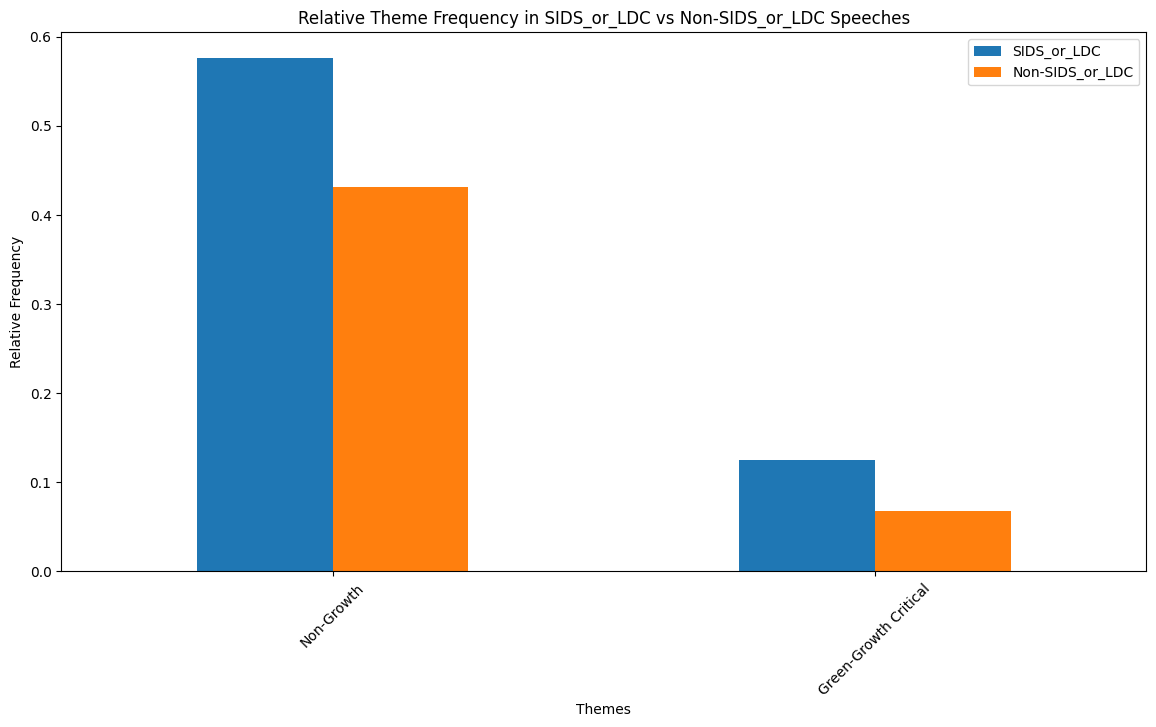

In [14]:
import pandas as pd
from scipy.stats import chi2_contingency
from statsmodels.stats.multitest import multipletests
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('analysisdataset.csv')

# Create a new column 'SIDS_or_LDC' to combine SIDS and LDC
df['SIDS_or_LDC'] = df.apply(lambda row: 'Yes' if row['SIDS'] == 'Yes' or row['LDC'] == 'Yes' else 'No', axis=1)

# Split the Theme_Combined column and create a long-format dataframe
df_themes = df.assign(Theme_Combined=df['Theme_Combined'].str.split()).explode('Theme_Combined')

# Ensure correct mapping of themes to their full names
theme_mapping = {
    'S_Int': 'Strong International',
    'S_Reg': 'Strong Regional',
    'S_Dom': 'Strong Domestic',
    'W_Int': 'Weak International',
    'W_Reg': 'Weak Regional',
    'W_Dom': 'Weak Domestic',
    'AG': 'Green-Growth Critical',
    'NG': 'Non-Growth'
}
df_themes['Theme_Combined'] = df_themes['Theme_Combined'].map(theme_mapping)

# Debug: Print the first few rows of the dataframe after mapping
print("Dataframe after mapping themes:")
print(df_themes.head())

# Calculate the number of speeches in each group
num_speeches_sids_or_ldc = df[df['SIDS_or_LDC'] == 'Yes'].shape[0]
num_speeches_non_sids_or_ldc = df[df['SIDS_or_LDC'] == 'No'].shape[0]

# Debug: Print the number of speeches in each group
print(f"Number of speeches in SIDS_or_LDC: {num_speeches_sids_or_ldc}")
print(f"Number of speeches in Non-SIDS_or_LDC: {num_speeches_non_sids_or_ldc}")

# Calculate the relative frequency of each theme for SIDS_or_LDC and Non-SIDS_or_LDC
relative_freq_sids_or_ldc = df_themes[df_themes['SIDS_or_LDC'] == 'Yes']['Theme_Combined'].value_counts() / num_speeches_sids_or_ldc
relative_freq_non_sids_or_ldc = df_themes[df_themes['SIDS_or_LDC'] == 'No']['Theme_Combined'].value_counts() / num_speeches_non_sids_or_ldc

# Debug: Print relative frequencies
print("Relative frequencies for SIDS_or_LDC:")
print(relative_freq_sids_or_ldc)
print("Relative frequencies for Non-SIDS_or_LDC:")
print(relative_freq_non_sids_or_ldc)

# Function to perform chi-square test for each theme
def chi_square_test(rel_freq_group1, rel_freq_group2):
    p_values = {}
    themes = set(rel_freq_group1.index).union(set(rel_freq_group2.index))
    for theme in themes:
        freq_group1 = rel_freq_group1.get(theme, 0) * num_speeches_sids_or_ldc
        freq_group2 = rel_freq_group2.get(theme, 0) * num_speeches_non_sids_or_ldc
        contingency_table = [[freq_group1, num_speeches_sids_or_ldc - freq_group1],
                             [freq_group2, num_speeches_non_sids_or_ldc - freq_group2]]
        _, p, _, _ = chi2_contingency(contingency_table)
        p_values[theme] = p
    return p_values

# Perform chi-square tests for themes
p_values = chi_square_test(relative_freq_sids_or_ldc, relative_freq_non_sids_or_ldc)

# Debug: Print p-values
print("P-values for SIDS_or_LDC vs Non-SIDS_or_LDC:")
print(p_values)

# Adjust p-values for multiple comparisons
_, p_adjusted, _, _ = multipletests(list(p_values.values()), method='bonferroni')
p_adjusted = dict(zip(p_values.keys(), p_adjusted))

# Debug: Print adjusted p-values
print("Adjusted P-values for SIDS_or_LDC vs Non-SIDS_or_LDC:")
print(p_adjusted)

# Combine data into a single dataframe for plotting
relative_freq_df = pd.DataFrame({
    'Theme': relative_freq_sids_or_ldc.index.union(relative_freq_non_sids_or_ldc.index),
    'Relative_Frequency_SIDS_or_LDC': relative_freq_sids_or_ldc,
    'Relative_Frequency_Non_SIDS_or_LDC': relative_freq_non_sids_or_ldc
}).fillna(0).set_index('Theme')

# Debug: Print the dataframe used for plotting
print("Dataframe for plotting:")
print(relative_freq_df)

# Plotting relative theme frequencies
relative_freq_df.plot(kind='bar', figsize=(14, 7))
plt.title('Relative Theme Frequency in SIDS_or_LDC vs Non-SIDS_or_LDC Speeches')
plt.xlabel('Themes')
plt.ylabel('Relative Frequency')
plt.xticks(rotation=45)
plt.legend(['SIDS_or_LDC', 'Non-SIDS_or_LDC'])
plt.show()


Dataframe after mapping themes:
   Country Name  Event    Language  Region  annotation_id no GG detected  \
0         Niger  COP26  translated  Africa            349            Yes   
1          Togo  COP28  translated  Africa            601            Yes   
2       Lesotho  COP24          en  Africa             35            Yes   
3     Mauritius  COP24          en  Africa             42            Yes   
4  Sierra Leone  COP24          en  Africa             53            Yes   

  region_specification         Theme_Combined  Year  Cumulative CO2  \
0                  NaN  Green-Growth Critical  2021        0.003010   
1                  NaN  Green-Growth Critical  2022        0.004017   
2                  NaN             Non-Growth  2018        0.003647   
3                  NaN             Non-Growth  2018        0.006598   
4                  NaN             Non-Growth  2018        0.002123   

     GDP_capita  Annual_Capita_CO2_Consumption    HDI HDI_Level  LDC SIDS  \
0    59

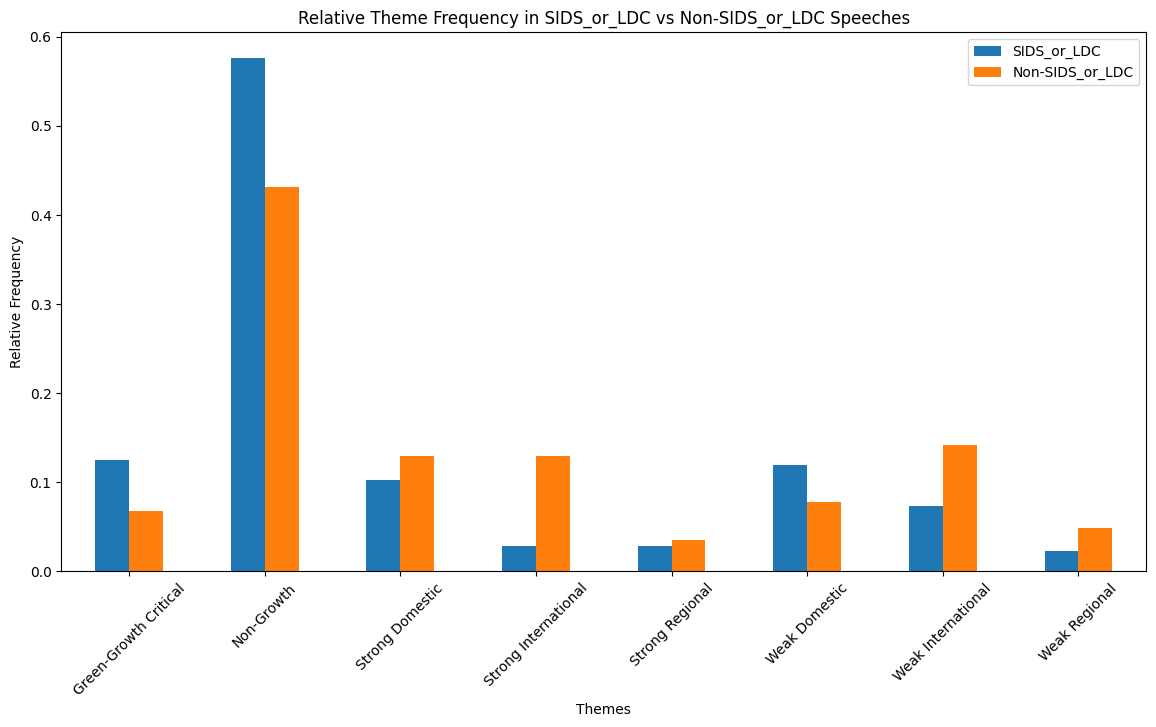

In [15]:
import pandas as pd
from scipy.stats import chi2_contingency
from statsmodels.stats.multitest import multipletests
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('analysisdataset.csv')

# Create a new column 'SIDS_or_LDC' to combine SIDS and LDC
df['SIDS_or_LDC'] = df.apply(lambda row: 'Yes' if row['SIDS'] == 'Yes' or row['LDC'] == 'Yes' else 'No', axis=1)

# Split the Theme_Combined column and create a long-format dataframe
df_themes = df.assign(Theme_Combined=df['Theme_Combined'].str.split()).explode('Theme_Combined')

# Ensure correct mapping of themes to their full names (keeping original mixed-case)
theme_mapping = {
    'S_int': 'Strong International',
    'S_reg': 'Strong Regional',
    'S_dom': 'Strong Domestic',
    'W_int': 'Weak International',
    'W_reg': 'Weak Regional',
    'W_dom': 'Weak Domestic',
    'AG': 'Green-Growth Critical',
    'NG': 'Non-Growth'
}
df_themes['Theme_Combined'] = df_themes['Theme_Combined'].map(theme_mapping)

# Debug: Print the first few rows of the dataframe after mapping
print("Dataframe after mapping themes:")
print(df_themes.head())

# Calculate the number of speeches in each group
num_speeches_sids_or_ldc = df[df['SIDS_or_LDC'] == 'Yes'].shape[0]
num_speeches_non_sids_or_ldc = df[df['SIDS_or_LDC'] == 'No'].shape[0]

# Debug: Print the number of speeches in each group
print(f"Number of speeches in SIDS_or_LDC: {num_speeches_sids_or_ldc}")
print(f"Number of speeches in Non-SIDS_or_LDC: {num_speeches_non_sids_or_ldc}")

# Calculate the relative frequency of each theme for SIDS_or_LDC and Non-SIDS_or_LDC
relative_freq_sids_or_ldc = df_themes[df_themes['SIDS_or_LDC'] == 'Yes']['Theme_Combined'].value_counts() / num_speeches_sids_or_ldc
relative_freq_non_sids_or_ldc = df_themes[df_themes['SIDS_or_LDC'] == 'No']['Theme_Combined'].value_counts() / num_speeches_non_sids_or_ldc

# Debug: Print relative frequencies
print("Relative frequencies for SIDS_or_LDC:")
print(relative_freq_sids_or_ldc)
print("Relative frequencies for Non-SIDS_or_LDC:")
print(relative_freq_non_sids_or_ldc)

# Function to perform chi-square test for each theme
def chi_square_test(rel_freq_group1, rel_freq_group2):
    p_values = {}
    themes = set(rel_freq_group1.index).union(set(rel_freq_group2.index))
    for theme in themes:
        freq_group1 = rel_freq_group1.get(theme, 0) * num_speeches_sids_or_ldc
        freq_group2 = rel_freq_group2.get(theme, 0) * num_speeches_non_sids_or_ldc
        contingency_table = [[freq_group1, num_speeches_sids_or_ldc - freq_group1],
                             [freq_group2, num_speeches_non_sids_or_ldc - freq_group2]]
        _, p, _, _ = chi2_contingency(contingency_table)
        p_values[theme] = p
    return p_values

# Perform chi-square tests for themes
p_values = chi_square_test(relative_freq_sids_or_ldc, relative_freq_non_sids_or_ldc)

# Debug: Print p-values
print("P-values for SIDS_or_LDC vs Non-SIDS_or_LDC:")
print(p_values)

# Adjust p-values for multiple comparisons
_, p_adjusted, _, _ = multipletests(list(p_values.values()), method='bonferroni')
p_adjusted = dict(zip(p_values.keys(), p_adjusted))

# Debug: Print adjusted p-values
print("Adjusted P-values for SIDS_or_LDC vs Non-SIDS_or_LDC:")
print(p_adjusted)

# Combine data into a single dataframe for plotting
relative_freq_df = pd.DataFrame({
    'Theme': relative_freq_sids_or_ldc.index.union(relative_freq_non_sids_or_ldc.index),
    'Relative_Frequency_SIDS_or_LDC': relative_freq_sids_or_ldc,
    'Relative_Frequency_Non_SIDS_or_LDC': relative_freq_non_sids_or_ldc
}).fillna(0).set_index('Theme')

# Debug: Print the dataframe used for plotting
print("Dataframe for plotting:")
print(relative_freq_df)

# Plotting relative theme frequencies
relative_freq_df.plot(kind='bar', figsize=(14, 7))
plt.title('Relative Theme Frequency in SIDS_or_LDC vs Non-SIDS_or_LDC Speeches')
plt.xlabel('Themes')
plt.ylabel('Relative Frequency')
plt.xticks(rotation=45)
plt.legend(['SIDS_or_LDC', 'Non-SIDS_or_LDC'])
plt.show()


Dataframe after mapping themes:
   Country Name  Event    Language  Region  annotation_id no GG detected  \
0         Niger  COP26  translated  Africa            349            Yes   
1          Togo  COP28  translated  Africa            601            Yes   
2       Lesotho  COP24          en  Africa             35            Yes   
3     Mauritius  COP24          en  Africa             42            Yes   
4  Sierra Leone  COP24          en  Africa             53            Yes   

  region_specification         Theme_Combined  Year  Cumulative CO2  \
0                  NaN  Green-Growth Critical  2021        0.003010   
1                  NaN  Green-Growth Critical  2022        0.004017   
2                  NaN             Non-Growth  2018        0.003647   
3                  NaN             Non-Growth  2018        0.006598   
4                  NaN             Non-Growth  2018        0.002123   

     GDP_capita  Annual_Capita_CO2_Consumption    HDI HDI_Level  LDC SIDS  \
0    59

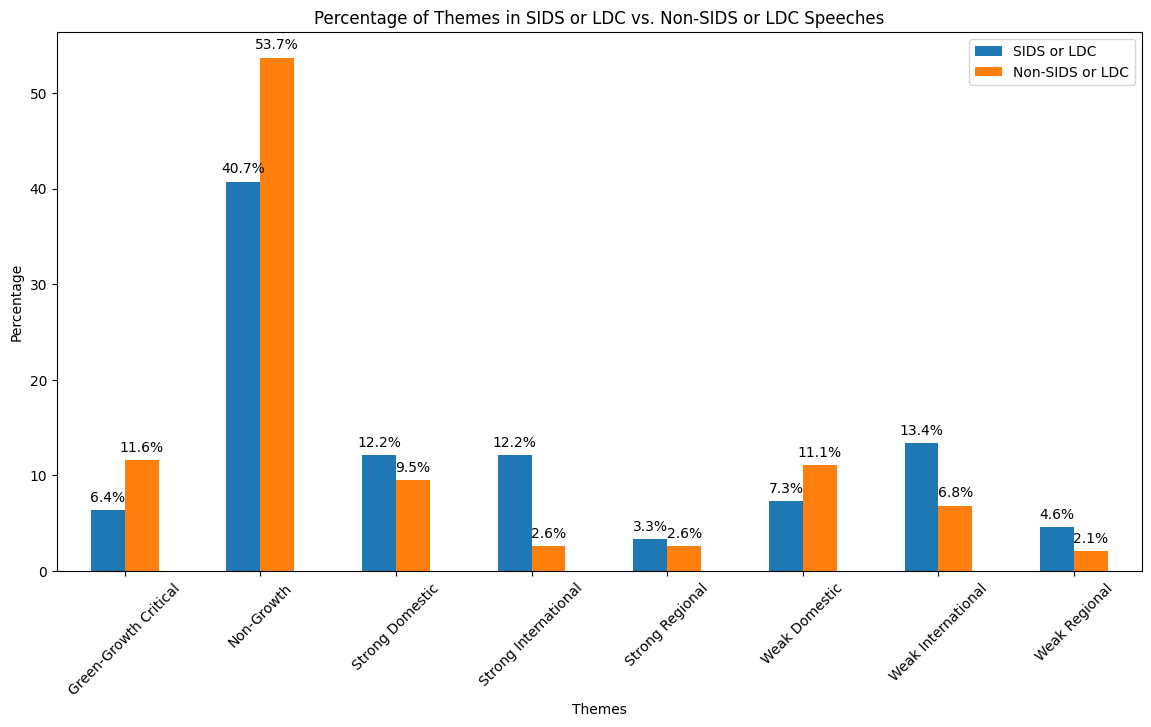

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('analysisdataset.csv')

# Create a new column 'SIDS_or_LDC' to combine SIDS and LDC
df['SIDS_or_LDC'] = df.apply(lambda row: 'SIDS or LDC' if row['SIDS'] == 'Yes' or row['LDC'] == 'Yes' else 'Non-SIDS or LDC', axis=1)

# Split the Theme_Combined column and create a long-format dataframe
df_themes = df.assign(Theme_Combined=df['Theme_Combined'].str.split()).explode('Theme_Combined')

# Ensure correct mapping of themes to their full names
theme_mapping = {
    'S_int': 'Strong International',
    'S_reg': 'Strong Regional',
    'S_dom': 'Strong Domestic',
    'W_int': 'Weak International',
    'W_reg': 'Weak Regional',
    'W_dom': 'Weak Domestic',
    'AG': 'Green-Growth Critical',
    'NG': 'Non-Growth'
}
df_themes['Theme_Combined'] = df_themes['Theme_Combined'].map(theme_mapping)

# Debug: Print the first few rows of the dataframe after mapping
print("Dataframe after mapping themes:")
print(df_themes.head())

# Group by theme and SIDS_or_LDC and count occurrences
grouped_data = df_themes.groupby(['SIDS_or_LDC', 'Theme_Combined']).size().reset_index(name='Count')

# Pivot the data to create a table of counts
pivot_table = grouped_data.pivot(index='Theme_Combined', columns='SIDS_or_LDC', values='Count').fillna(0)

# Calculate the total counts for each group
totals = pivot_table.sum(axis=0)
print("Total counts for each group:")
print(totals)

# Calculate the percentages
percentages = pivot_table.div(totals, axis=1) * 100
print("Percentages for each theme by group:")
print(percentages)

# Verify that the total percentages add up to 100 for each group
total_percentages = percentages.sum(axis=0)
print("Total percentages for each group:")
print(total_percentages)

# Plotting percentages
fig, ax = plt.subplots(figsize=(14, 7))
percentages.plot(kind='bar', ax=ax)

# Adding percentages on top of the bars
for p in ax.patches:
    percentage = p.get_height()
    ax.annotate(f'{percentage:.1f}%', 
                (p.get_x() + p.get_width() / 2., percentage), 
                ha='center', va='center', 
                xytext=(0, 9), 
                textcoords='offset points')

# Adjusting the plot
plt.title('Percentage of Themes in SIDS or LDC vs. Non-SIDS or LDC Speeches')
plt.xlabel('Themes')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(['SIDS or LDC', 'Non-SIDS or LDC'])
plt.show()


                Theme      Chi2  P-Value  Adjusted P-Value Significance
Green-Growth Critical  3.622838 0.056992          0.455932           No
           Non-Growth  7.638100 0.005715          0.045718          Yes
      Strong Domestic  0.624809 0.429266          1.000000           No
 Strong International 12.626725 0.000380          0.003042          Yes
      Strong Regional  0.035499 0.850554          1.000000           No
        Weak Domestic  1.699463 0.192358          1.000000           No
   Weak International  4.609175 0.031801          0.254411           No
        Weak Regional  1.419626 0.233465          1.000000           No


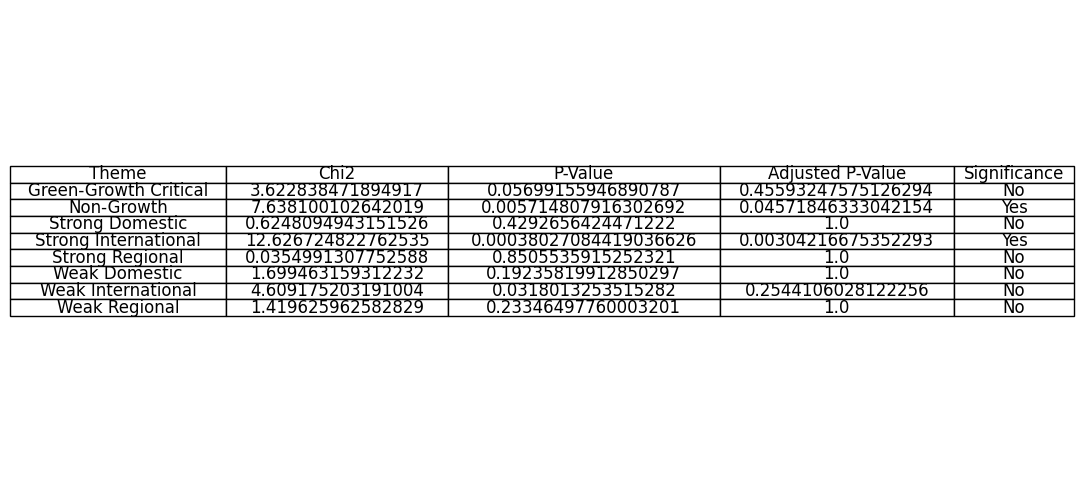

In [28]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
from statsmodels.stats.multitest import multipletests
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('analysisdataset.csv')

# Create a new column 'SIDS_or_LDC' to combine SIDS and LDC
df['SIDS_or_LDC'] = df.apply(lambda row: 'SIDS or LDC' if row['SIDS'] == 'Yes' or row['LDC'] == 'Yes' else 'Non-SIDS or LDC', axis=1)

# Split the Theme_Combined column and create a long-format dataframe
df_themes = df.assign(Theme_Combined=df['Theme_Combined'].str.split()).explode('Theme_Combined')

# Ensure correct mapping of themes to their full names
theme_mapping = {
    'S_int': 'Strong International',
    'S_reg': 'Strong Regional',
    'S_dom': 'Strong Domestic',
    'W_int': 'Weak International',
    'W_reg': 'Weak Regional',
    'W_dom': 'Weak Domestic',
    'AG': 'Green-Growth Critical',
    'NG': 'Non-Growth'
}
df_themes['Theme_Combined'] = df_themes['Theme_Combined'].map(theme_mapping)

# Group by theme and SIDS_or_LDC and count occurrences
grouped_data = df_themes.groupby(['SIDS_or_LDC', 'Theme_Combined']).size().reset_index(name='Count')

# Pivot the data to create a table of counts
pivot_table = grouped_data.pivot(index='Theme_Combined', columns='SIDS_or_LDC', values='Count').fillna(0)

# Perform chi-square tests
chi2_results = []
themes = pivot_table.index

for theme in themes:
    count_sids_ldc = pivot_table.loc[theme, 'SIDS or LDC']
    count_non_sids_ldc = pivot_table.loc[theme, 'Non-SIDS or LDC']
    
    # Create contingency table
    contingency_table = np.array([[count_sids_ldc, pivot_table['SIDS or LDC'].sum() - count_sids_ldc],
                                  [count_non_sids_ldc, pivot_table['Non-SIDS or LDC'].sum() - count_non_sids_ldc]])
    
    # Perform chi-square test
    chi2, p, _, _ = chi2_contingency(contingency_table)
    chi2_results.append([theme, chi2, p])

# Create a DataFrame for results
results_df = pd.DataFrame(chi2_results, columns=['Theme', 'Chi2', 'P-Value'])

# Adjust p-values for multiple comparisons
results_df['Adjusted P-Value'] = multipletests(results_df['P-Value'], method='bonferroni')[1]

# Determine significance
results_df['Significance'] = results_df['Adjusted P-Value'] < 0.05
results_df['Significance'] = results_df['Significance'].map({True: 'Yes', False: 'No'})

# Print the results table
print(results_df.to_string(index=False))

# Plotting the results table
fig, ax = plt.subplots(figsize=(10, 6))
ax.axis('off')
table = ax.table(cellText=results_df.values, colLabels=results_df.columns, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.auto_set_column_width(col=list(range(len(results_df.columns))))

# Save the table as a PNG file
plt.savefig('chi_square_results.png', bbox_inches='tight', dpi=300)
plt.show()


                Theme      Chi2  P-Value  Adjusted P-Value Significance
Green-Growth Critical  3.622838 0.056992          0.455932           No
           Non-Growth  7.638100 0.005715          0.045718          Yes
      Strong Domestic  0.624809 0.429266          1.000000           No
 Strong International 12.626725 0.000380          0.003042          Yes
      Strong Regional  0.035499 0.850554          1.000000           No
        Weak Domestic  1.699463 0.192358          1.000000           No
   Weak International  4.609175 0.031801          0.254411           No
        Weak Regional  1.419626 0.233465          1.000000           No


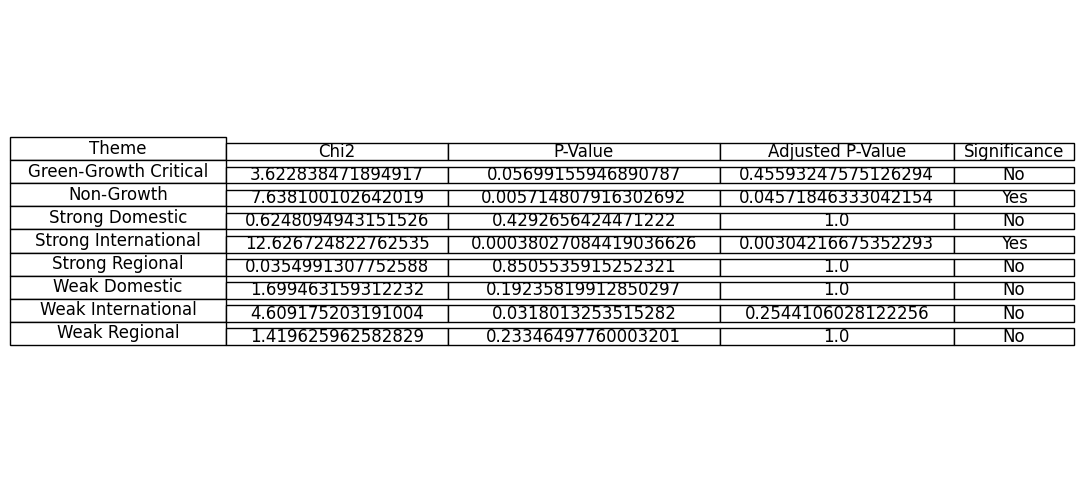

In [34]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
from statsmodels.stats.multitest import multipletests
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('analysisdataset.csv')

# Create a new column 'SIDS_or_LDC' to combine SIDS and LDC
df['SIDS_or_LDC'] = df.apply(lambda row: 'SIDS or LDC' if row['SIDS'] == 'Yes' or row['LDC'] == 'Yes' else 'Non-SIDS or LDC', axis=1)

# Split the Theme_Combined column and create a long-format dataframe
df_themes = df.assign(Theme_Combined=df['Theme_Combined'].str.split()).explode('Theme_Combined')

# Ensure correct mapping of themes to their full names
theme_mapping = {
    'S_int': 'Strong International',
    'S_reg': 'Strong Regional',
    'S_dom': 'Strong Domestic',
    'W_int': 'Weak International',
    'W_reg': 'Weak Regional',
    'W_dom': 'Weak Domestic',
    'AG': 'Green-Growth Critical',
    'NG': 'Non-Growth'
}
df_themes['Theme_Combined'] = df_themes['Theme_Combined'].map(theme_mapping)

# Group by theme and SIDS_or_LDC and count occurrences
grouped_data = df_themes.groupby(['SIDS_or_LDC', 'Theme_Combined']).size().reset_index(name='Count')

# Pivot the data to create a table of counts
pivot_table = grouped_data.pivot(index='Theme_Combined', columns='SIDS_or_LDC', values='Count').fillna(0)

# Perform chi-square tests
chi2_results = []
themes = pivot_table.index

for theme in themes:
    count_sids_ldc = pivot_table.loc[theme, 'SIDS or LDC']
    count_non_sids_ldc = pivot_table.loc[theme, 'Non-SIDS or LDC']
    
    # Create contingency table
    contingency_table = np.array([[count_sids_ldc, pivot_table['SIDS or LDC'].sum() - count_sids_ldc],
                                  [count_non_sids_ldc, pivot_table['Non-SIDS or LDC'].sum() - count_non_sids_ldc]])
    
    # Perform chi-square test
    chi2, p, _, _ = chi2_contingency(contingency_table)
    chi2_results.append([theme, chi2, p])

# Create a DataFrame for results
results_df = pd.DataFrame(chi2_results, columns=['Theme', 'Chi2', 'P-Value'])

# Adjust p-values for multiple comparisons
results_df['Adjusted P-Value'] = multipletests(results_df['P-Value'], method='bonferroni')[1]

# Determine significance
results_df['Significance'] = results_df['Adjusted P-Value'] < 0.05
results_df['Significance'] = results_df['Significance'].map({True: 'Yes', False: 'No'})


# Print the results table
print(results_df.to_string(index=False))

# Plotting the results table
fig, ax = plt.subplots(figsize=(10, 6))
ax.axis('off')

# Create table with wider rows
table = ax.table(cellText=results_df.values, colLabels=results_df.columns, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.auto_set_column_width(col=list(range(len(results_df.columns))))

# Adjust row height
for i in range(len(results_df) + 1):
    table[(i, 0)].set_height(0.05)

# Save the table as a PNG file
plt.savefig('chi_square_results.png', bbox_inches='tight', dpi=300)
plt.show()


                Theme     Chi2  P-Value  Adjusted P-Value Significance
Green-Growth Critical 1.076910 0.299390          0.598780           No
           Non-Growth 2.867258 0.090399          0.361595           No
      Strong Domestic 0.147061 0.701360          0.801555           No
 Strong International 5.308189 0.021225          0.169803           No
      Strong Regional 0.000000 1.000000          1.000000           No
        Weak Domestic 0.456392 0.499315          0.755662           No
   Weak International 1.683877 0.194410          0.518427           No
        Weak Regional 0.328157 0.566746          0.755662           No


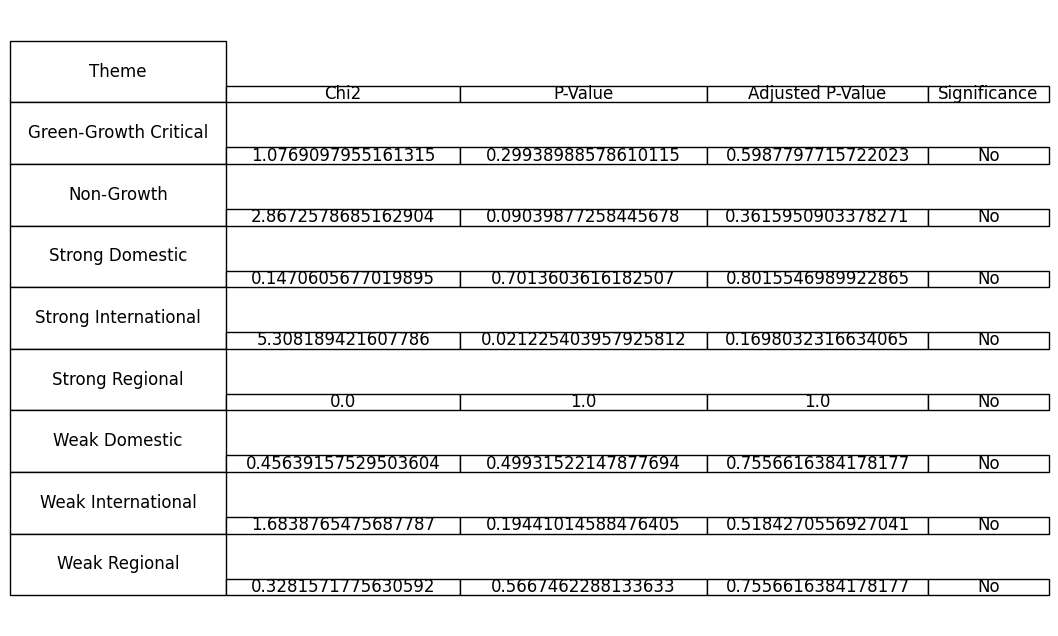

In [35]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
from statsmodels.stats.multitest import multipletests
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('analysisdataset.csv')

# Create a new column 'SIDS_or_LDC' to combine SIDS and LDC
df['SIDS_or_LDC'] = df.apply(lambda row: 'SIDS or LDC' if row['SIDS'] == 'Yes' or row['LDC'] == 'Yes' else 'Non-SIDS or LDC', axis=1)

# Split the Theme_Combined column and create a long-format dataframe
df_themes = df.assign(Theme_Combined=df['Theme_Combined'].str.split()).explode('Theme_Combined')

# Ensure correct mapping of themes to their full names
theme_mapping = {
    'S_int': 'Strong International',
    'S_reg': 'Strong Regional',
    'S_dom': 'Strong Domestic',
    'W_int': 'Weak International',
    'W_reg': 'Weak Regional',
    'W_dom': 'Weak Domestic',
    'AG': 'Green-Growth Critical',
    'NG': 'Non-Growth'
}
df_themes['Theme_Combined'] = df_themes['Theme_Combined'].map(theme_mapping)

# Group by theme and SIDS_or_LDC and count occurrences
grouped_data = df_themes.groupby(['SIDS_or_LDC', 'Theme_Combined']).size().reset_index(name='Count')

# Pivot the data to create a table of counts
pivot_table = grouped_data.pivot(index='Theme_Combined', columns='SIDS_or_LDC', values='Count').fillna(0)

# Calculate the total counts for each group
totals = pivot_table.sum(axis=0)

# Calculate the percentages
percentages = pivot_table.div(totals, axis=1) * 100

# Perform chi-square tests based on relative frequencies
chi2_results = []
themes = pivot_table.index

for theme in themes:
    count_sids_ldc = pivot_table.loc[theme, 'SIDS or LDC']
    count_non_sids_ldc = pivot_table.loc[theme, 'Non-SIDS or LDC']
    
    # Calculate percentages
    percentage_sids_ldc = count_sids_ldc / totals['SIDS or LDC'] * 100
    percentage_non_sids_ldc = count_non_sids_ldc / totals['Non-SIDS or LDC'] * 100
    
    # Create contingency table based on percentages
    contingency_table = np.array([[percentage_sids_ldc, 100 - percentage_sids_ldc],
                                  [percentage_non_sids_ldc, 100 - percentage_non_sids_ldc]])
    
    # Perform chi-square test
    chi2, p, _, _ = chi2_contingency(contingency_table)
    chi2_results.append([theme, chi2, p])

# Create a DataFrame for results
results_df = pd.DataFrame(chi2_results, columns=['Theme', 'Chi2', 'P-Value'])

# Adjust p-values for multiple comparisons using Benjamini-Hochberg
results_df['Adjusted P-Value'] = multipletests(results_df['P-Value'], method='fdr_bh')[1]

# Determine significance
results_df['Significance'] = results_df['Adjusted P-Value'] < 0.05
results_df['Significance'] = results_df['Significance'].map({True: 'Yes', False: 'No'})


# Print the results table
print(results_df.to_string(index=False))

# Plotting the results table
fig, ax = plt.subplots(figsize=(12, 8))
ax.axis('off')

# Create table with wider rows
table = ax.table(cellText=results_df.values, colLabels=results_df.columns, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.auto_set_column_width(col=list(range(len(results_df.columns))))

# Adjust row height
for i in range(len(results_df) + 1):
    table[(i, 0)].set_height(0.1)

# Save the table as a PNG file
plt.savefig('chi_square_results.png', bbox_inches='tight', dpi=300)
plt.show()


                Theme Chi2  P-Value Adjusted P-Value Significance
Green-Growth Critical 1.08 2.99e-01         5.99e-01           No
           Non-Growth 2.87 9.04e-02         3.62e-01           No
      Strong Domestic 0.15 7.01e-01         8.02e-01           No
 Strong International 5.31 2.12e-02         1.70e-01           No
      Strong Regional 0.00 1.00e+00         1.00e+00           No
        Weak Domestic 0.46 4.99e-01         7.56e-01           No
   Weak International 1.68 1.94e-01         5.18e-01           No
        Weak Regional 0.33 5.67e-01         7.56e-01           No


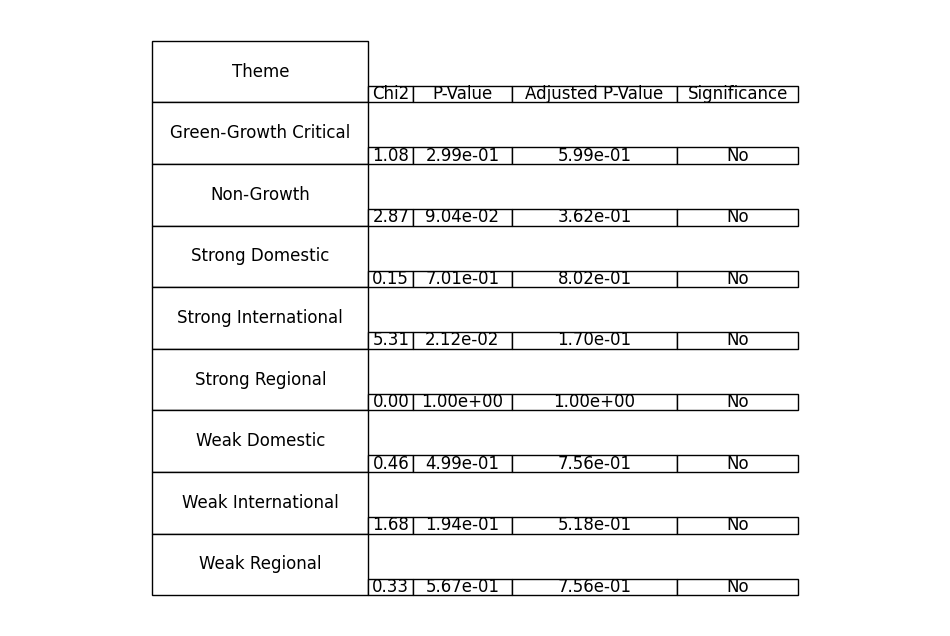

In [33]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
from statsmodels.stats.multitest import multipletests
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('analysisdataset.csv')

# Create a new column 'SIDS_or_LDC' to combine SIDS and LDC
df['SIDS_or_LDC'] = df.apply(lambda row: 'SIDS or LDC' if row['SIDS'] == 'Yes' or row['LDC'] == 'Yes' else 'Non-SIDS or LDC', axis=1)

# Split the Theme_Combined column and create a long-format dataframe
df_themes = df.assign(Theme_Combined=df['Theme_Combined'].str.split()).explode('Theme_Combined')

# Ensure correct mapping of themes to their full names
theme_mapping = {
    'S_int': 'Strong International',
    'S_reg': 'Strong Regional',
    'S_dom': 'Strong Domestic',
    'W_int': 'Weak International',
    'W_reg': 'Weak Regional',
    'W_dom': 'Weak Domestic',
    'AG': 'Green-Growth Critical',
    'NG': 'Non-Growth'
}
df_themes['Theme_Combined'] = df_themes['Theme_Combined'].map(theme_mapping)

# Group by theme and SIDS_or_LDC and count occurrences
grouped_data = df_themes.groupby(['SIDS_or_LDC', 'Theme_Combined']).size().reset_index(name='Count')

# Pivot the data to create a table of counts
pivot_table = grouped_data.pivot(index='Theme_Combined', columns='SIDS_or_LDC', values='Count').fillna(0)

# Calculate the total counts for each group
totals = pivot_table.sum(axis=0)

# Perform chi-square tests based on relative frequencies
chi2_results = []
themes = pivot_table.index

for theme in themes:
    count_sids_ldc = pivot_table.loc[theme, 'SIDS or LDC']
    count_non_sids_ldc = pivot_table.loc[theme, 'Non-SIDS or LDC']
    
    # Calculate percentages
    percentage_sids_ldc = count_sids_ldc / totals['SIDS or LDC'] * 100
    percentage_non_sids_ldc = count_non_sids_ldc / totals['Non-SIDS or LDC'] * 100
    
    # Create contingency table based on percentages
    contingency_table = np.array([[percentage_sids_ldc, 100 - percentage_sids_ldc],
                                  [percentage_non_sids_ldc, 100 - percentage_non_sids_ldc]])
    
    # Perform chi-square test
    chi2, p, _, _ = chi2_contingency(contingency_table)
    chi2_results.append([theme, chi2, p])

# Create a DataFrame for results
results_df = pd.DataFrame(chi2_results, columns=['Theme', 'Chi2', 'P-Value'])

# Adjust p-values for multiple comparisons using Benjamini-Hochberg
results_df['Adjusted P-Value'] = multipletests(results_df['P-Value'], method='fdr_bh')[1]

# Determine significance
results_df['Significance'] = results_df['Adjusted P-Value'] < 0.05
results_df['Significance'] = results_df['Significance'].map({True: 'Yes', False: 'No'})

# Format the numbers to 2 significant figures
results_df['Chi2'] = results_df['Chi2'].apply(lambda x: f'{x:.2f}')
results_df['P-Value'] = results_df['P-Value'].apply(lambda x: f'{x:.2e}')
results_df['Adjusted P-Value'] = results_df['Adjusted P-Value'].apply(lambda x: f'{x:.2e}')

# Print the results table
print(results_df.to_string(index=False))

# Plotting the results table
fig, ax = plt.subplots(figsize=(12, 8))
ax.axis('off')

# Create table with wider rows
table = ax.table(cellText=results_df.values, colLabels=results_df.columns, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.auto_set_column_width(col=list(range(len(results_df.columns))))

# Adjust row height
for i in range(len(results_df) + 1):
    table[(i, 0)].set_height(0.1)

# Save the table as a PNG file
plt.savefig('chi_square_results.png', bbox_inches='tight', dpi=300)
plt.show()


Dataframe after mapping and combining themes:
   Country Name  Event    Language  Region  annotation_id no GG detected  \
0         Niger  COP26  translated  Africa            349            Yes   
1          Togo  COP28  translated  Africa            601            Yes   
2       Lesotho  COP24          en  Africa             35            Yes   
3     Mauritius  COP24          en  Africa             42            Yes   
4  Sierra Leone  COP24          en  Africa             53            Yes   

  region_specification         Theme_Combined  Year  Cumulative CO2  \
0                  NaN  Green-Growth Critical  2021        0.003010   
1                  NaN  Green-Growth Critical  2022        0.004017   
2                  NaN             Non-Growth  2018        0.003647   
3                  NaN             Non-Growth  2018        0.006598   
4                  NaN             Non-Growth  2018        0.002123   

     GDP_capita  Annual_Capita_CO2_Consumption    HDI HDI_Level  LDC S

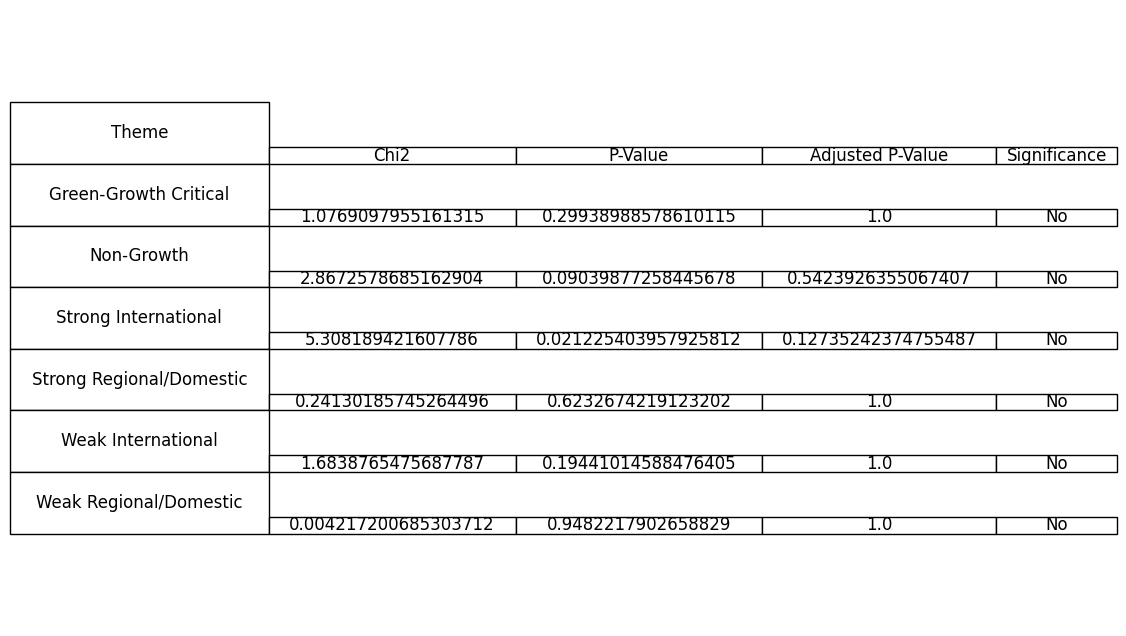

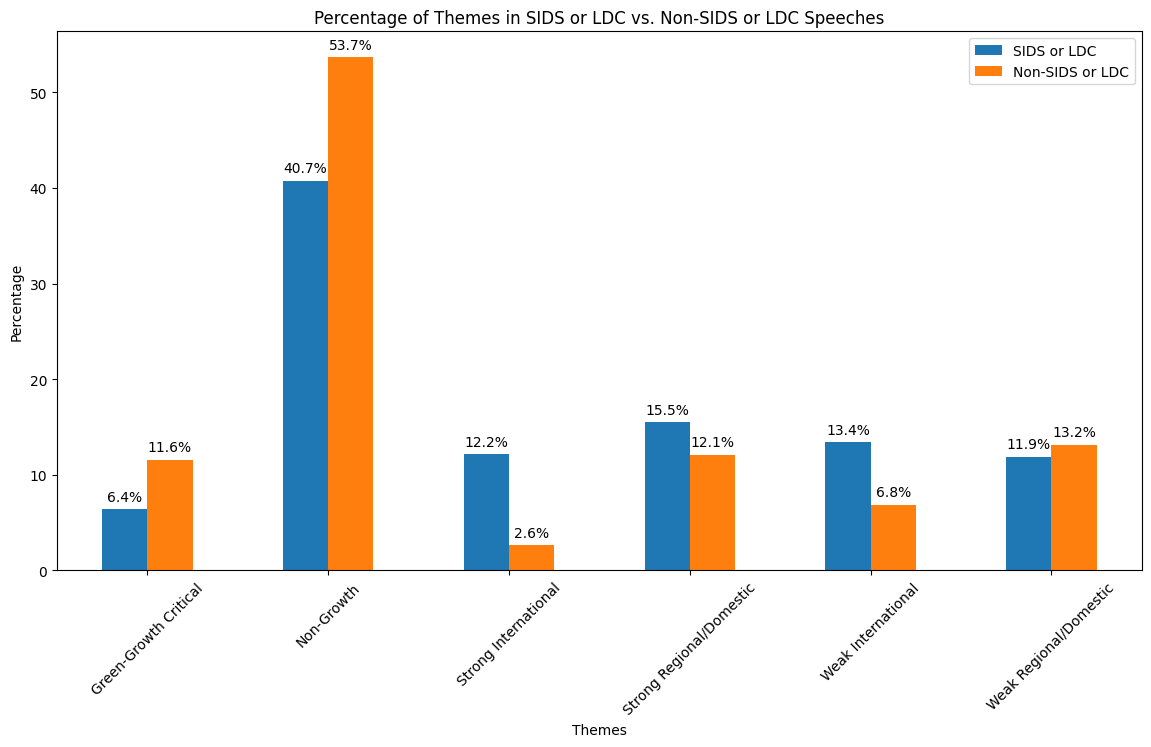

In [38]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
from statsmodels.stats.multitest import multipletests
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('analysisdataset.csv')

# Create a new column 'SIDS_or_LDC' to combine SIDS and LDC
df['SIDS_or_LDC'] = df.apply(lambda row: 'SIDS or LDC' if row['SIDS'] == 'Yes' or row['LDC'] == 'Yes' else 'Non-SIDS or LDC', axis=1)

# Split the Theme_Combined column and create a long-format dataframe
df_themes = df.assign(Theme_Combined=df['Theme_Combined'].str.split()).explode('Theme_Combined')

# Ensure correct mapping of themes to their full names and combine specified themes
theme_mapping = {
    'S_int': 'Strong International',
    'S_reg': 'Strong Regional',
    'S_dom': 'Strong Domestic',
    'W_int': 'Weak International',
    'W_reg': 'Weak Regional',
    'W_dom': 'Weak Domestic',
    'AG': 'Green-Growth Critical',
    'NG': 'Non-Growth'
}

# Map themes
df_themes['Theme_Combined'] = df_themes['Theme_Combined'].map(theme_mapping)

# Combine Strong Regional and Strong Domestic into Strong Regional/Domestic
df_themes['Theme_Combined'] = df_themes['Theme_Combined'].replace({'Strong Regional': 'Strong Regional/Domestic',
                                                                    'Strong Domestic': 'Strong Regional/Domestic',
                                                                    'Weak Regional': 'Weak Regional/Domestic',
                                                                    'Weak Domestic': 'Weak Regional/Domestic'})

# Debug: Print the first few rows of the dataframe after mapping and combining themes
print("Dataframe after mapping and combining themes:")
print(df_themes.head())

# Group by theme and SIDS_or_LDC and count occurrences
grouped_data = df_themes.groupby(['SIDS_or_LDC', 'Theme_Combined']).size().reset_index(name='Count')

# Pivot the data to create a table of counts
pivot_table = grouped_data.pivot(index='Theme_Combined', columns='SIDS_or_LDC', values='Count').fillna(0)

# Calculate the total counts for each group
totals = pivot_table.sum(axis=0)
print("Total counts for each group:")
print(totals)

# Calculate the percentages
percentages = pivot_table.div(totals, axis=1) * 100
print("Percentages for each theme by group:")
print(percentages)

# Verify that the total percentages add up to 100 for each group
total_percentages = percentages.sum(axis=0)
print("Total percentages for each group:")
print(total_percentages)

# Perform chi-square tests based on relative frequencies
chi2_results = []
themes = pivot_table.index

for theme in themes:
    count_sids_ldc = pivot_table.loc[theme, 'SIDS or LDC']
    count_non_sids_ldc = pivot_table.loc[theme, 'Non-SIDS or LDC']
    
    # Calculate percentages
    percentage_sids_ldc = count_sids_ldc / totals['SIDS or LDC'] * 100
    percentage_non_sids_ldc = count_non_sids_ldc / totals['Non-SIDS or LDC'] * 100
    
    # Create contingency table based on percentages
    contingency_table = np.array([[percentage_sids_ldc, 100 - percentage_sids_ldc],
                                  [percentage_non_sids_ldc, 100 - percentage_non_sids_ldc]])
    
    # Perform chi-square test
    chi2, p, _, _ = chi2_contingency(contingency_table)
    chi2_results.append([theme, chi2, p])

# Create a DataFrame for results
results_df = pd.DataFrame(chi2_results, columns=['Theme', 'Chi2', 'P-Value'])

# Adjust p-values for multiple comparisons using Bonferroni correction
results_df['Adjusted P-Value'] = multipletests(results_df['P-Value'], method='bonferroni')[1]

# Determine significance
results_df['Significance'] = results_df['Adjusted P-Value'] < 0.05
results_df['Significance'] = results_df['Significance'].map({True: 'Yes', False: 'No'})

# Print the results table
print(results_df.to_string(index=False))

# Plotting the results table
fig, ax = plt.subplots(figsize=(12, 8))
ax.axis('off')

# Create table with wider rows
table = ax.table(cellText=results_df.values, colLabels=results_df.columns, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.auto_set_column_width(col=list(range(len(results_df.columns))))

# Adjust row height
for i in range(len(results_df) + 1):
    table[(i, 0)].set_height(0.1)

# Save the table as a PNG file
# plt.savefig('chi_square_results.png', bbox_inches='tight', dpi=300)
plt.show()

# Plotting percentages
fig, ax = plt.subplots(figsize=(14, 7))
percentages.plot(kind='bar', ax=ax)

# Adding percentages on top of the bars
for p in ax.patches:
    percentage = p.get_height()
    ax.annotate(f'{percentage:.1f}%', 
                (p.get_x() + p.get_width() / 2., percentage), 
                ha='center', va='center', 
                xytext=(0, 9), 
                textcoords='offset points')

# Adjusting the plot
plt.title('Percentage of Themes in SIDS or LDC vs. Non-SIDS or LDC Speeches')
plt.xlabel('Themes')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(['SIDS or LDC', 'Non-SIDS or LDC'])
plt.show()


Dataframe after mapping and combining themes:
   Country Name  Event    Language  Region  annotation_id no GG detected  \
0         Niger  COP26  translated  Africa            349            Yes   
1          Togo  COP28  translated  Africa            601            Yes   
2       Lesotho  COP24          en  Africa             35            Yes   
3     Mauritius  COP24          en  Africa             42            Yes   
4  Sierra Leone  COP24          en  Africa             53            Yes   

  region_specification         Theme_Combined  Year  Cumulative CO2  \
0                  NaN  Green-Growth Critical  2021        0.003010   
1                  NaN  Green-Growth Critical  2022        0.004017   
2                  NaN             Non-Growth  2018        0.003647   
3                  NaN             Non-Growth  2018        0.006598   
4                  NaN             Non-Growth  2018        0.002123   

     GDP_capita  Annual_Capita_CO2_Consumption    HDI HDI_Level  LDC S

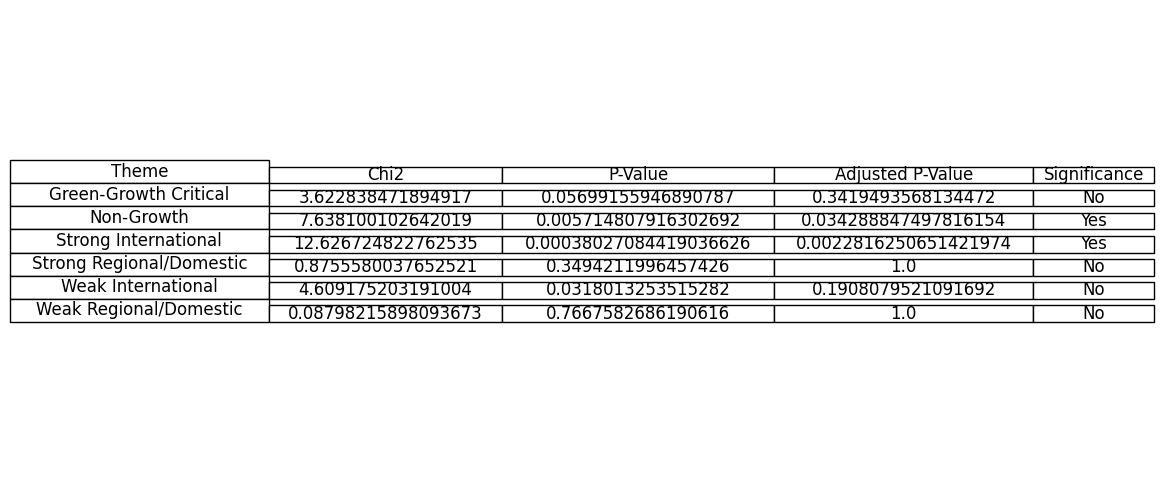

Total counts for each group:
SIDS_or_LDC
Non-SIDS or LDC    329
SIDS or LDC        190
dtype: int64
Percentages for each theme by group:
SIDS_or_LDC               Non-SIDS or LDC  SIDS or LDC
Theme_Combined                                        
Green-Growth Critical            6.382979    11.578947
Non-Growth                      40.729483    53.684211
Strong International            12.158055     2.631579
Strong Regional/Domestic        15.501520    12.105263
Weak International              13.373860     6.842105
Weak Regional/Domestic          11.854103    13.157895
Total percentages for each group:
SIDS_or_LDC
Non-SIDS or LDC    100.0
SIDS or LDC        100.0
dtype: float64


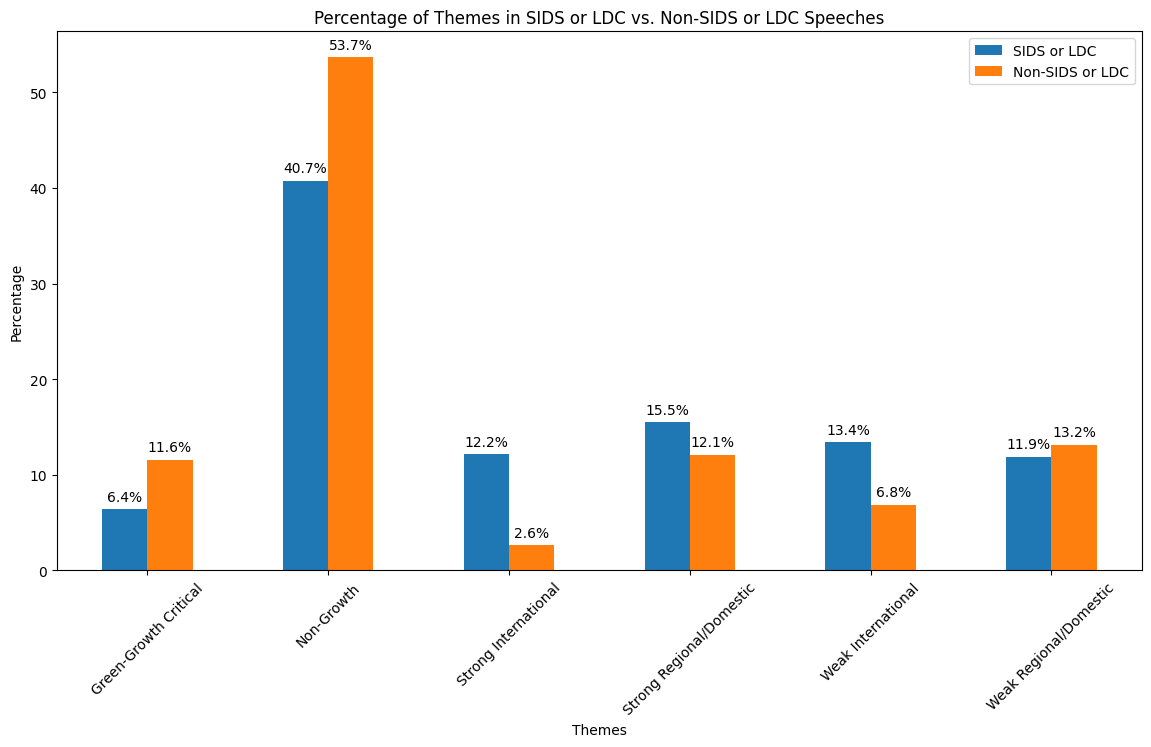

In [39]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
from statsmodels.stats.multitest import multipletests
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('analysisdataset.csv')

# Create a new column 'SIDS_or_LDC' to combine SIDS and LDC
df['SIDS_or_LDC'] = df.apply(lambda row: 'SIDS or LDC' if row['SIDS'] == 'Yes' or row['LDC'] == 'Yes' else 'Non-SIDS or LDC', axis=1)

# Split the Theme_Combined column and create a long-format dataframe
df_themes = df.assign(Theme_Combined=df['Theme_Combined'].str.split()).explode('Theme_Combined')

# Ensure correct mapping of themes to their full names and combine specified themes
theme_mapping = {
    'S_int': 'Strong International',
    'S_reg': 'Strong Regional',
    'S_dom': 'Strong Domestic',
    'W_int': 'Weak International',
    'W_reg': 'Weak Regional',
    'W_dom': 'Weak Domestic',
    'AG': 'Green-Growth Critical',
    'NG': 'Non-Growth'
}

# Map themes
df_themes['Theme_Combined'] = df_themes['Theme_Combined'].map(theme_mapping)

# Combine Strong Regional and Strong Domestic into Strong Regional/Domestic
df_themes['Theme_Combined'] = df_themes['Theme_Combined'].replace({'Strong Regional': 'Strong Regional/Domestic',
                                                                    'Strong Domestic': 'Strong Regional/Domestic',
                                                                    'Weak Regional': 'Weak Regional/Domestic',
                                                                    'Weak Domestic': 'Weak Regional/Domestic'})

# Debug: Print the first few rows of the dataframe after mapping and combining themes
print("Dataframe after mapping and combining themes:")
print(df_themes.head())

# Group by theme and SIDS_or_LDC and count occurrences
grouped_data = df_themes.groupby(['SIDS_or_LDC', 'Theme_Combined']).size().reset_index(name='Count')

# Pivot the data to create a table of counts
pivot_table = grouped_data.pivot(index='Theme_Combined', columns='SIDS_or_LDC', values='Count').fillna(0)

# Perform chi-square tests
chi2_results = []
themes = pivot_table.index

for theme in themes:
    count_sids_ldc = pivot_table.loc[theme, 'SIDS or LDC']
    count_non_sids_ldc = pivot_table.loc[theme, 'Non-SIDS or LDC']
    
    # Create contingency table
    contingency_table = np.array([[count_sids_ldc, pivot_table['SIDS or LDC'].sum() - count_sids_ldc],
                                  [count_non_sids_ldc, pivot_table['Non-SIDS or LDC'].sum() - count_non_sids_ldc]])
    
    # Perform chi-square test
    chi2, p, _, _ = chi2_contingency(contingency_table)
    chi2_results.append([theme, chi2, p])

# Create a DataFrame for results
results_df = pd.DataFrame(chi2_results, columns=['Theme', 'Chi2', 'P-Value'])

# Adjust p-values for multiple comparisons using Bonferroni correction
results_df['Adjusted P-Value'] = multipletests(results_df['P-Value'], method='bonferroni')[1]

# Determine significance
results_df['Significance'] = results_df['Adjusted P-Value'] < 0.05
results_df['Significance'] = results_df['Significance'].map({True: 'Yes', False: 'No'})

# Print the results table
print(results_df.to_string(index=False))

# Plotting the results table
fig, ax = plt.subplots(figsize=(10, 6))
ax.axis('off')

# Create table with wider rows
table = ax.table(cellText=results_df.values, colLabels=results_df.columns, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.auto_set_column_width(col=list(range(len(results_df.columns))))

# Adjust row height
for i in range(len(results_df) + 1):
    table[(i, 0)].set_height(0.05)

# Save the table as a PNG file
plt.savefig('chi_square_results.png', bbox_inches='tight', dpi=300)
plt.show()

# Calculate the total counts for each group
totals = pivot_table.sum(axis=0)
print("Total counts for each group:")
print(totals)

# Calculate the percentages
percentages = pivot_table.div(totals, axis=1) * 100
print("Percentages for each theme by group:")
print(percentages)

# Verify that the total percentages add up to 100 for each group
total_percentages = percentages.sum(axis=0)
print("Total percentages for each group:")
print(total_percentages)

# Plotting percentages
fig, ax = plt.subplots(figsize=(14, 7))
percentages.plot(kind='bar', ax=ax)

# Adding percentages on top of the bars
for p in ax.patches:
    percentage = p.get_height()
    ax.annotate(f'{percentage:.1f}%', 
                (p.get_x() + p.get_width() / 2., percentage), 
                ha='center', va='center', 
                xytext=(0, 9), 
                textcoords='offset points')

# Adjusting the plot
plt.title('Percentage of Themes in SIDS or LDC vs. Non-SIDS or LDC Speeches')
plt.xlabel('Themes')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(['SIDS or LDC', 'Non-SIDS or LDC'])
plt.show()


Dataframe after mapping and combining themes:
   Country Name  Event    Language  Region  annotation_id no GG detected  \
0         Niger  COP26  translated  Africa            349            Yes   
1          Togo  COP28  translated  Africa            601            Yes   
2       Lesotho  COP24          en  Africa             35            Yes   
3     Mauritius  COP24          en  Africa             42            Yes   
4  Sierra Leone  COP24          en  Africa             53            Yes   

  region_specification         Theme_Combined  Year  Cumulative CO2  \
0                  NaN  Green-Growth Critical  2021        0.003010   
1                  NaN  Green-Growth Critical  2022        0.004017   
2                  NaN             Non-Growth  2018        0.003647   
3                  NaN             Non-Growth  2018        0.006598   
4                  NaN             Non-Growth  2018        0.002123   

     GDP_capita  Annual_Capita_CO2_Consumption    HDI HDI_Level  LDC S

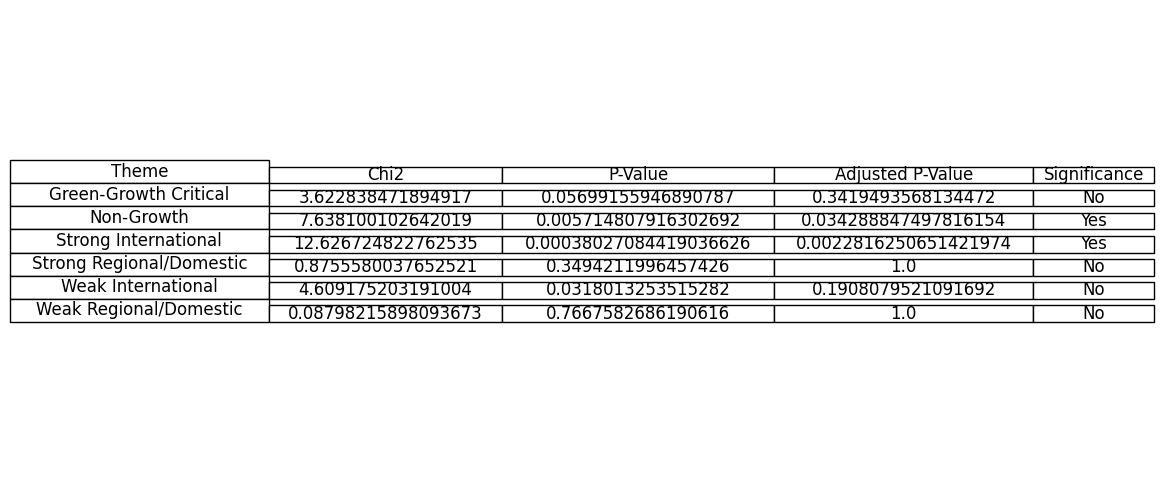

Total counts for each group:
SIDS_or_LDC
Non-SIDS or LDC    329
SIDS or LDC        190
dtype: int64
Percentages for each theme by group:
SIDS_or_LDC               Non-SIDS or LDC  SIDS or LDC
Theme_Combined                                        
Green-Growth Critical            6.382979    11.578947
Non-Growth                      40.729483    53.684211
Strong International            12.158055     2.631579
Strong Regional/Domestic        15.501520    12.105263
Weak International              13.373860     6.842105
Weak Regional/Domestic          11.854103    13.157895
Total percentages for each group:
SIDS_or_LDC
Non-SIDS or LDC    100.0
SIDS or LDC        100.0
dtype: float64


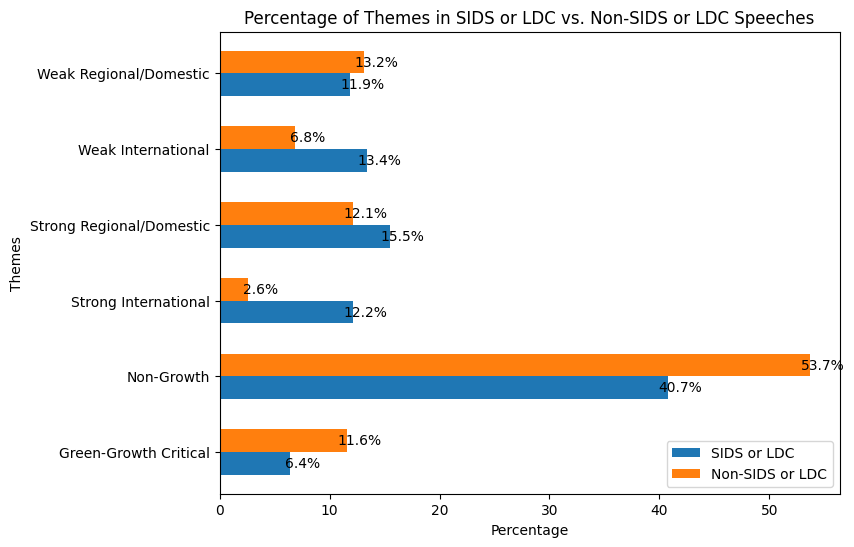

In [40]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
from statsmodels.stats.multitest import multipletests
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('analysisdataset.csv')

# Create a new column 'SIDS_or_LDC' to combine SIDS and LDC
df['SIDS_or_LDC'] = df.apply(lambda row: 'SIDS or LDC' if row['SIDS'] == 'Yes' or row['LDC'] == 'Yes' else 'Non-SIDS or LDC', axis=1)

# Split the Theme_Combined column and create a long-format dataframe
df_themes = df.assign(Theme_Combined=df['Theme_Combined'].str.split()).explode('Theme_Combined')

# Ensure correct mapping of themes to their full names and combine specified themes
theme_mapping = {
    'S_int': 'Strong International',
    'S_reg': 'Strong Regional',
    'S_dom': 'Strong Domestic',
    'W_int': 'Weak International',
    'W_reg': 'Weak Regional',
    'W_dom': 'Weak Domestic',
    'AG': 'Green-Growth Critical',
    'NG': 'Non-Growth'
}

# Map themes
df_themes['Theme_Combined'] = df_themes['Theme_Combined'].map(theme_mapping)

# Combine Strong Regional and Strong Domestic into Strong Regional/Domestic
df_themes['Theme_Combined'] = df_themes['Theme_Combined'].replace({'Strong Regional': 'Strong Regional/Domestic',
                                                                    'Strong Domestic': 'Strong Regional/Domestic',
                                                                    'Weak Regional': 'Weak Regional/Domestic',
                                                                    'Weak Domestic': 'Weak Regional/Domestic'})

# Debug: Print the first few rows of the dataframe after mapping and combining themes
print("Dataframe after mapping and combining themes:")
print(df_themes.head())

# Group by theme and SIDS_or_LDC and count occurrences
grouped_data = df_themes.groupby(['SIDS_or_LDC', 'Theme_Combined']).size().reset_index(name='Count')

# Pivot the data to create a table of counts
pivot_table = grouped_data.pivot(index='Theme_Combined', columns='SIDS_or_LDC', values='Count').fillna(0)

# Perform chi-square tests
chi2_results = []
themes = pivot_table.index

for theme in themes:
    count_sids_ldc = pivot_table.loc[theme, 'SIDS or LDC']
    count_non_sids_ldc = pivot_table.loc[theme, 'Non-SIDS or LDC']
    
    # Create contingency table
    contingency_table = np.array([[count_sids_ldc, pivot_table['SIDS or LDC'].sum() - count_sids_ldc],
                                  [count_non_sids_ldc, pivot_table['Non-SIDS or LDC'].sum() - count_non_sids_ldc]])
    
    # Perform chi-square test
    chi2, p, _, _ = chi2_contingency(contingency_table)
    chi2_results.append([theme, chi2, p])

# Create a DataFrame for results
results_df = pd.DataFrame(chi2_results, columns=['Theme', 'Chi2', 'P-Value'])

# Adjust p-values for multiple comparisons using Bonferroni correction
results_df['Adjusted P-Value'] = multipletests(results_df['P-Value'], method='bonferroni')[1]

# Determine significance
results_df['Significance'] = results_df['Adjusted P-Value'] < 0.05
results_df['Significance'] = results_df['Significance'].map({True: 'Yes', False: 'No'})

# Print the results table
print(results_df.to_string(index=False))

# Plotting the results table
fig, ax = plt.subplots(figsize=(10, 6))
ax.axis('off')

# Create table with wider rows
table = ax.table(cellText=results_df.values, colLabels=results_df.columns, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.auto_set_column_width(col=list(range(len(results_df.columns))))

# Adjust row height
for i in range(len(results_df) + 1):
    table[(i, 0)].set_height(0.05)

# Save the table as a PNG file
# plt.savefig('chi_square_results.png', bbox_inches='tight', dpi=300)
plt.show()

# Calculate the total counts for each group
totals = pivot_table.sum(axis=0)
print("Total counts for each group:")
print(totals)

# Calculate the percentages
percentages = pivot_table.div(totals, axis=1) * 100
print("Percentages for each theme by group:")
print(percentages)

# Verify that the total percentages add up to 100 for each group
total_percentages = percentages.sum(axis=0)
print("Total percentages for each group:")
print(total_percentages)

# Plotting percentages horizontally with thinner bars
fig, ax = plt.subplots(figsize=(8, 6))
percentages.plot(kind='barh', ax=ax, width=0.6)

# Adding percentages on top of the bars
for p in ax.patches:
    percentage = p.get_width()
    ax.annotate(f'{percentage:.1f}%', 
                (percentage, p.get_y() + p.get_height() / 2.), 
                ha='center', va='center', 
                xytext=(9, 0), 
                textcoords='offset points')

# Adjusting the plot
plt.title('Percentage of Themes in SIDS or LDC vs. Non-SIDS or LDC Speeches')
plt.xlabel('Percentage')
plt.ylabel('Themes')
plt.legend(['SIDS or LDC', 'Non-SIDS or LDC'], loc='lower right')
plt.show()


Dataframe after mapping and combining themes:
   Country Name  Event    Language  Region  annotation_id no GG detected  \
0         Niger  COP26  translated  Africa            349            Yes   
1          Togo  COP28  translated  Africa            601            Yes   
2       Lesotho  COP24          en  Africa             35            Yes   
3     Mauritius  COP24          en  Africa             42            Yes   
4  Sierra Leone  COP24          en  Africa             53            Yes   

  region_specification         Theme_Combined  Year  Cumulative CO2  \
0                  NaN  Green-Growth Critical  2021        0.003010   
1                  NaN  Green-Growth Critical  2022        0.004017   
2                  NaN             Non-Growth  2018        0.003647   
3                  NaN             Non-Growth  2018        0.006598   
4                  NaN             Non-Growth  2018        0.002123   

     GDP_capita  Annual_Capita_CO2_Consumption    HDI HDI_Level  LDC S

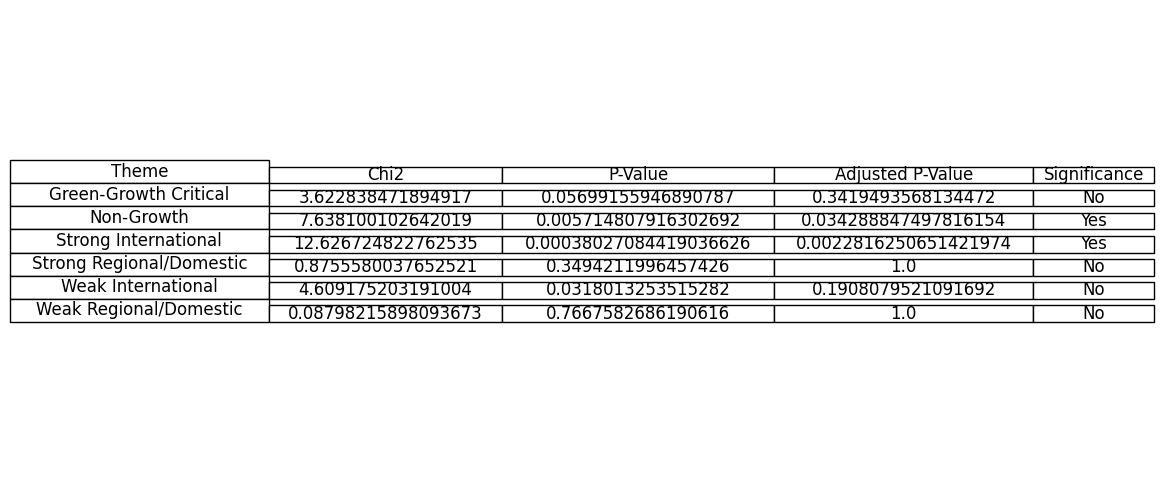

Total counts for each group:
SIDS_or_LDC
Non-SIDS or LDC    329
SIDS or LDC        190
dtype: int64
Percentages for each theme by group:
SIDS_or_LDC               Non-SIDS or LDC  SIDS or LDC
Theme_Combined                                        
Green-Growth Critical            6.382979    11.578947
Non-Growth                      40.729483    53.684211
Strong International            12.158055     2.631579
Strong Regional/Domestic        15.501520    12.105263
Weak International              13.373860     6.842105
Weak Regional/Domestic          11.854103    13.157895
Total percentages for each group:
SIDS_or_LDC
Non-SIDS or LDC    100.0
SIDS or LDC        100.0
dtype: float64


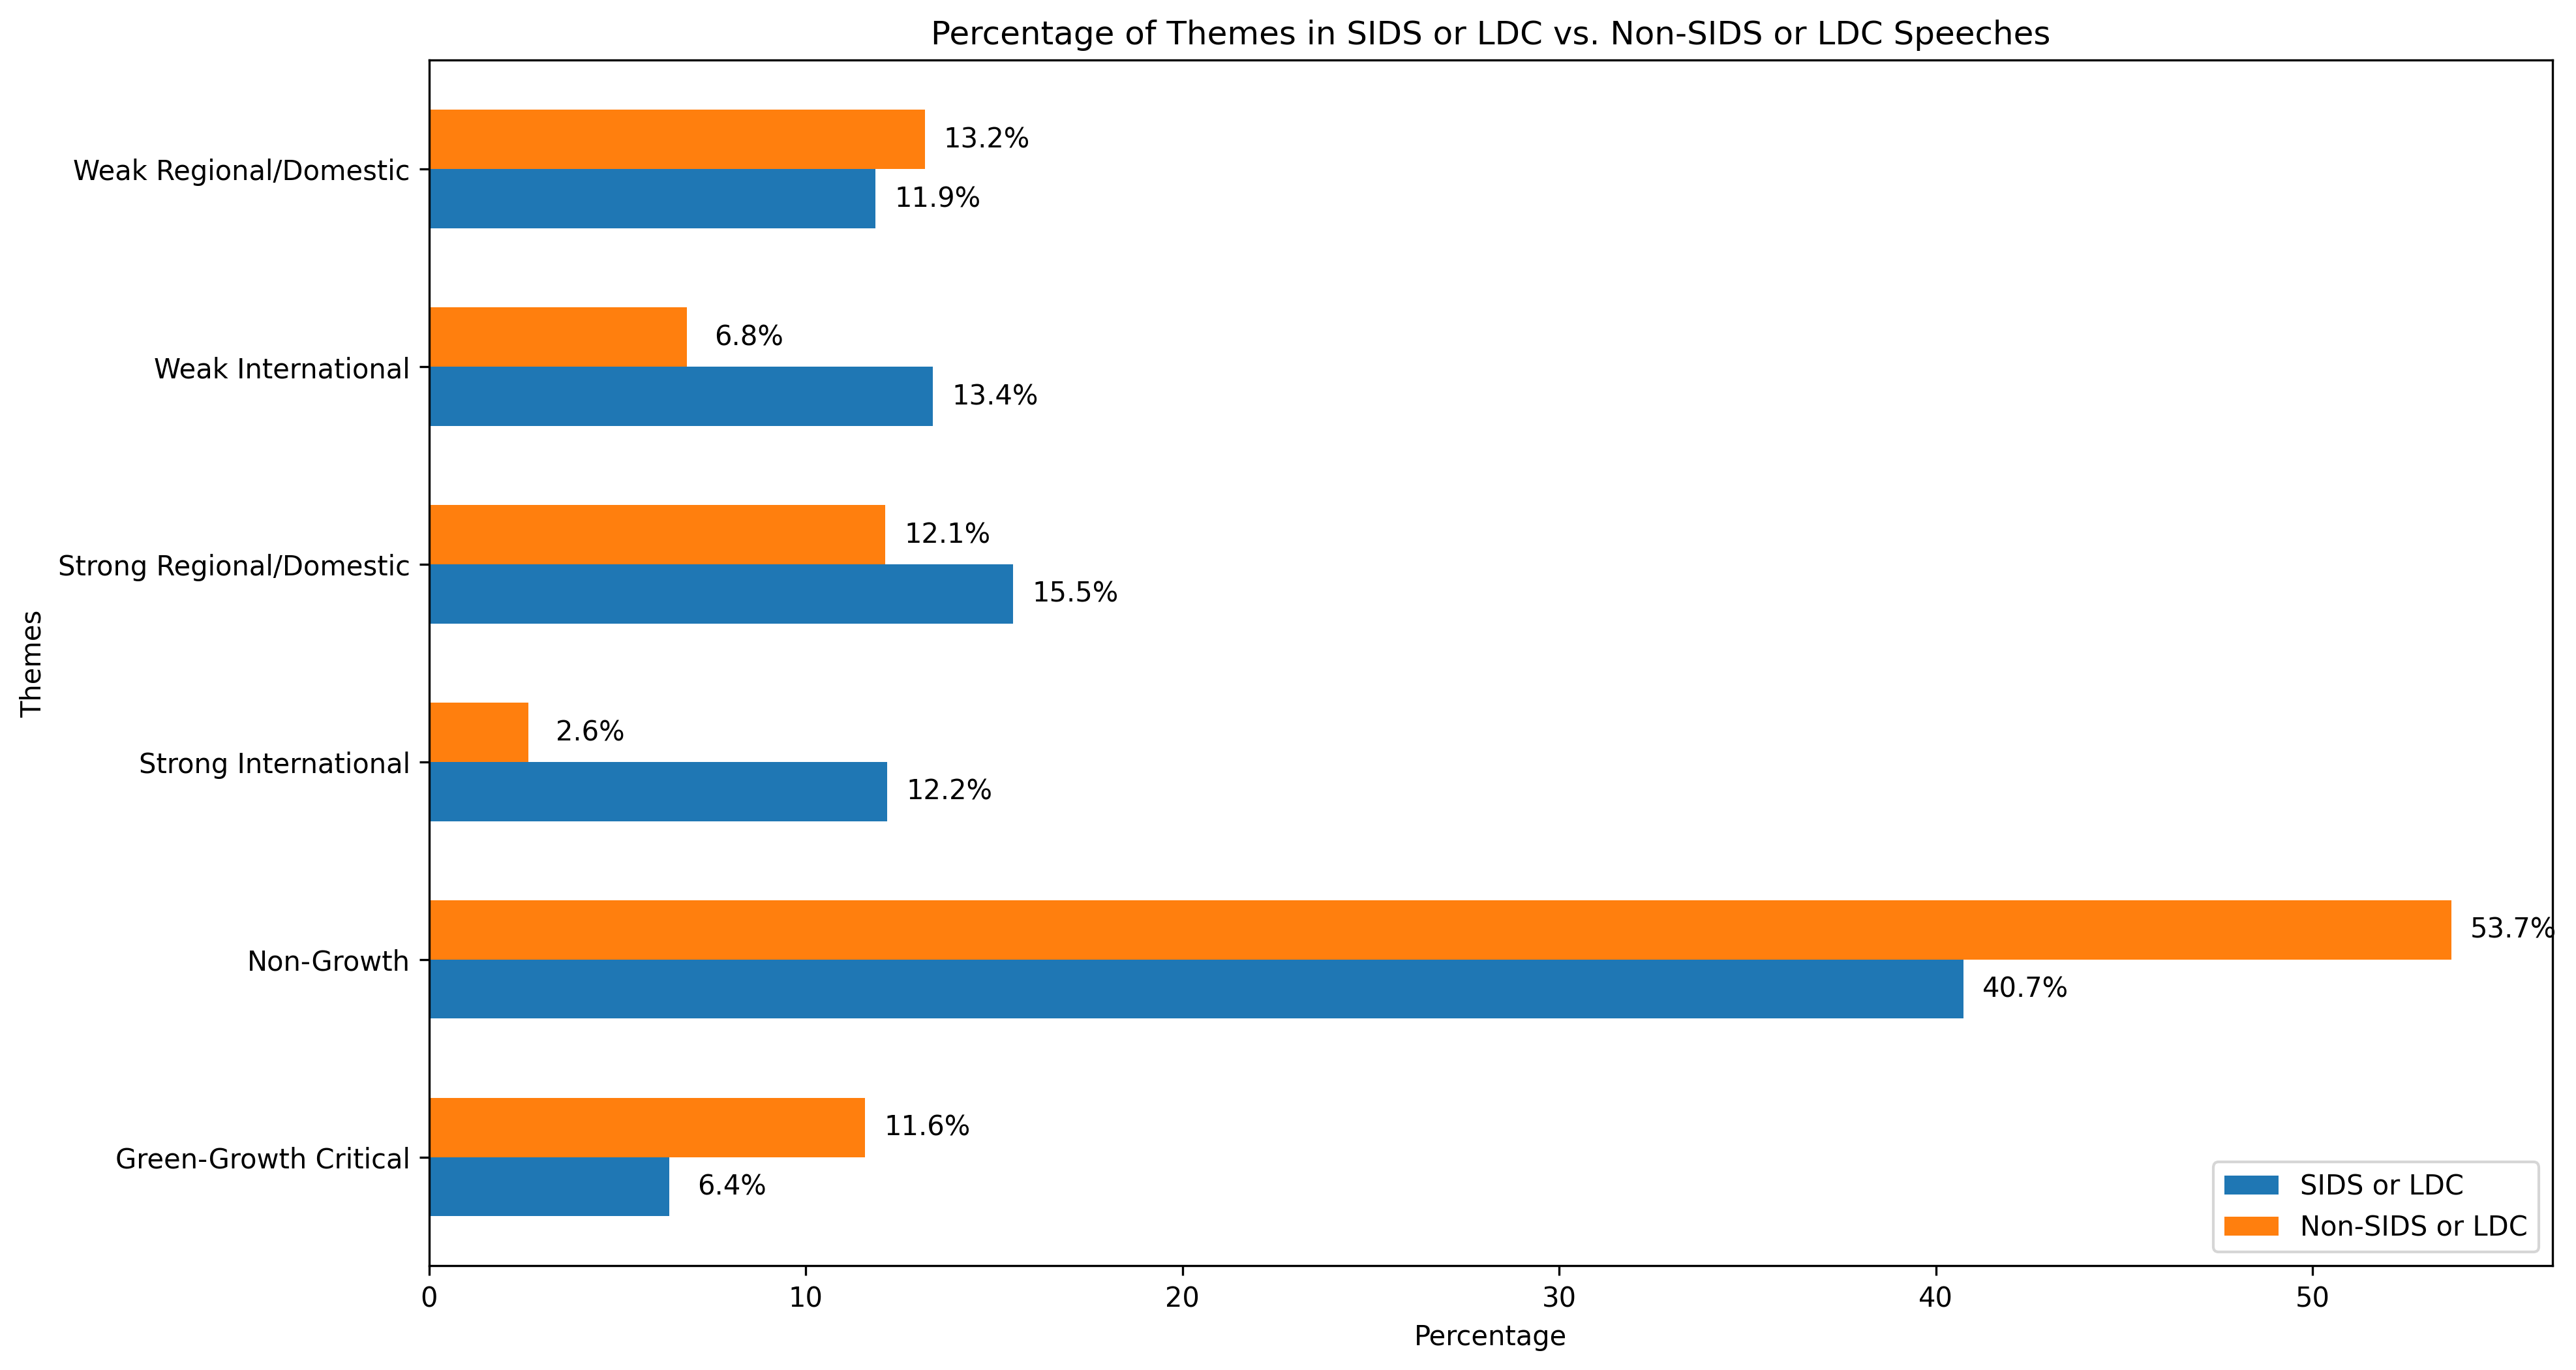

In [41]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
from statsmodels.stats.multitest import multipletests
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('analysisdataset.csv')

# Create a new column 'SIDS_or_LDC' to combine SIDS and LDC
df['SIDS_or_LDC'] = df.apply(lambda row: 'SIDS or LDC' if row['SIDS'] == 'Yes' or row['LDC'] == 'Yes' else 'Non-SIDS or LDC', axis=1)

# Split the Theme_Combined column and create a long-format dataframe
df_themes = df.assign(Theme_Combined=df['Theme_Combined'].str.split()).explode('Theme_Combined')

# Ensure correct mapping of themes to their full names and combine specified themes
theme_mapping = {
    'S_int': 'Strong International',
    'S_reg': 'Strong Regional',
    'S_dom': 'Strong Domestic',
    'W_int': 'Weak International',
    'W_reg': 'Weak Regional',
    'W_dom': 'Weak Domestic',
    'AG': 'Green-Growth Critical',
    'NG': 'Non-Growth'
}

# Map themes
df_themes['Theme_Combined'] = df_themes['Theme_Combined'].map(theme_mapping)

# Combine Strong Regional and Strong Domestic into Strong Regional/Domestic
df_themes['Theme_Combined'] = df_themes['Theme_Combined'].replace({'Strong Regional': 'Strong Regional/Domestic',
                                                                    'Strong Domestic': 'Strong Regional/Domestic',
                                                                    'Weak Regional': 'Weak Regional/Domestic',
                                                                    'Weak Domestic': 'Weak Regional/Domestic'})

# Debug: Print the first few rows of the dataframe after mapping and combining themes
print("Dataframe after mapping and combining themes:")
print(df_themes.head())

# Group by theme and SIDS_or_LDC and count occurrences
grouped_data = df_themes.groupby(['SIDS_or_LDC', 'Theme_Combined']).size().reset_index(name='Count')

# Pivot the data to create a table of counts
pivot_table = grouped_data.pivot(index='Theme_Combined', columns='SIDS_or_LDC', values='Count').fillna(0)

# Perform chi-square tests
chi2_results = []
themes = pivot_table.index

for theme in themes:
    count_sids_ldc = pivot_table.loc[theme, 'SIDS or LDC']
    count_non_sids_ldc = pivot_table.loc[theme, 'Non-SIDS or LDC']
    
    # Create contingency table
    contingency_table = np.array([[count_sids_ldc, pivot_table['SIDS or LDC'].sum() - count_sids_ldc],
                                  [count_non_sids_ldc, pivot_table['Non-SIDS or LDC'].sum() - count_non_sids_ldc]])
    
    # Perform chi-square test
    chi2, p, _, _ = chi2_contingency(contingency_table)
    chi2_results.append([theme, chi2, p])

# Create a DataFrame for results
results_df = pd.DataFrame(chi2_results, columns=['Theme', 'Chi2', 'P-Value'])

# Adjust p-values for multiple comparisons using Bonferroni correction
results_df['Adjusted P-Value'] = multipletests(results_df['P-Value'], method='bonferroni')[1]

# Determine significance
results_df['Significance'] = results_df['Adjusted P-Value'] < 0.05
results_df['Significance'] = results_df['Significance'].map({True: 'Yes', False: 'No'})

# Print the results table
print(results_df.to_string(index=False))

# Plotting the results table
fig, ax = plt.subplots(figsize=(10, 6))
ax.axis('off')

# Create table with wider rows
table = ax.table(cellText=results_df.values, colLabels=results_df.columns, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.auto_set_column_width(col=list(range(len(results_df.columns))))

# Adjust row height
for i in range(len(results_df) + 1):
    table[(i, 0)].set_height(0.05)

# Save the table as a PNG file
plt.savefig('chi_square_results.png', bbox_inches='tight', dpi=300)
plt.show()

# Calculate the total counts for each group
totals = pivot_table.sum(axis=0)
print("Total counts for each group:")
print(totals)

# Calculate the percentages
percentages = pivot_table.div(totals, axis=1) * 100
print("Percentages for each theme by group:")
print(percentages)

# Verify that the total percentages add up to 100 for each group
total_percentages = percentages.sum(axis=0)
print("Total percentages for each group:")
print(total_percentages)

# Plotting percentages horizontally with thinner bars
fig, ax = plt.subplots(figsize=(14, 8), dpi=300)
percentages.plot(kind='barh', ax=ax, width=0.6)

# Adding percentages on top of the bars
for p in ax.patches:
    percentage = p.get_width()
    ax.annotate(f'{percentage:.1f}%', 
                (percentage + 1, p.get_y() + p.get_height() / 2.),  # Move the annotation slightly to the right
                ha='center', va='center', 
                xytext=(9, 0), 
                textcoords='offset points')

# Adjusting the plot
plt.title('Percentage of Themes in SIDS or LDC vs. Non-SIDS or LDC Speeches')
plt.xlabel('Percentage')
plt.ylabel('Themes')
plt.legend(['SIDS or LDC', 'Non-SIDS or LDC'], loc='lower right')
plt.show()


Dataframe after mapping and combining themes:
   Country Name  Event    Language  Region  annotation_id no GG detected  \
0         Niger  COP26  translated  Africa            349            Yes   
1          Togo  COP28  translated  Africa            601            Yes   
2       Lesotho  COP24          en  Africa             35            Yes   
3     Mauritius  COP24          en  Africa             42            Yes   
4  Sierra Leone  COP24          en  Africa             53            Yes   

  region_specification         Theme_Combined  Year  Cumulative CO2  \
0                  NaN  Green-Growth Critical  2021        0.003010   
1                  NaN  Green-Growth Critical  2022        0.004017   
2                  NaN             Non-Growth  2018        0.003647   
3                  NaN             Non-Growth  2018        0.006598   
4                  NaN             Non-Growth  2018        0.002123   

     GDP_capita  Annual_Capita_CO2_Consumption    HDI HDI_Level  LDC S

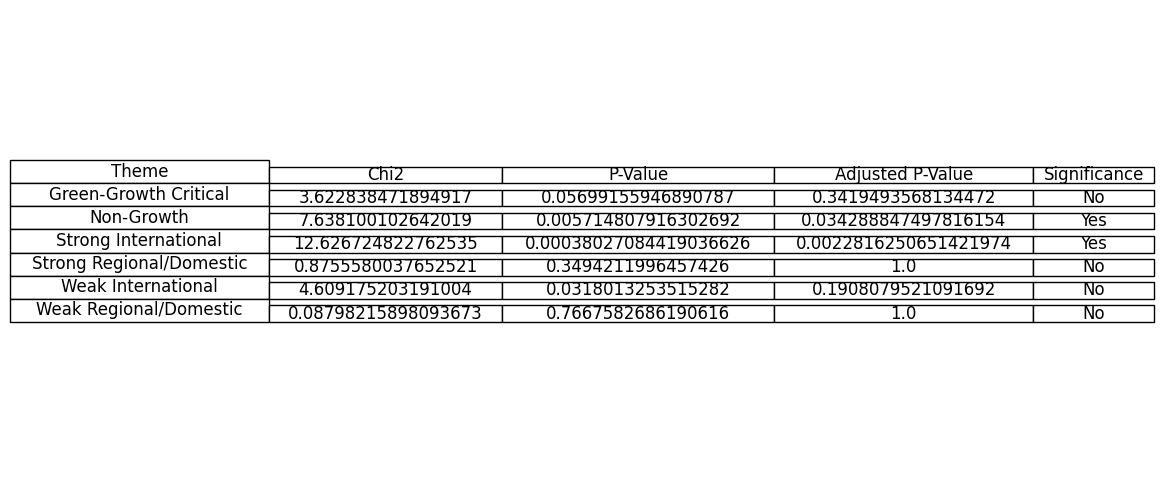

Total counts for each group:
SIDS_or_LDC
Non-SIDS or LDC    329
SIDS or LDC        190
dtype: int64
Percentages for each theme by group:
SIDS_or_LDC               Non-SIDS or LDC  SIDS or LDC
Theme_Combined                                        
Green-Growth Critical            6.382979    11.578947
Non-Growth                      40.729483    53.684211
Strong International            12.158055     2.631579
Strong Regional/Domestic        15.501520    12.105263
Weak International              13.373860     6.842105
Weak Regional/Domestic          11.854103    13.157895
Total percentages for each group:
SIDS_or_LDC
Non-SIDS or LDC    100.0
SIDS or LDC        100.0
dtype: float64


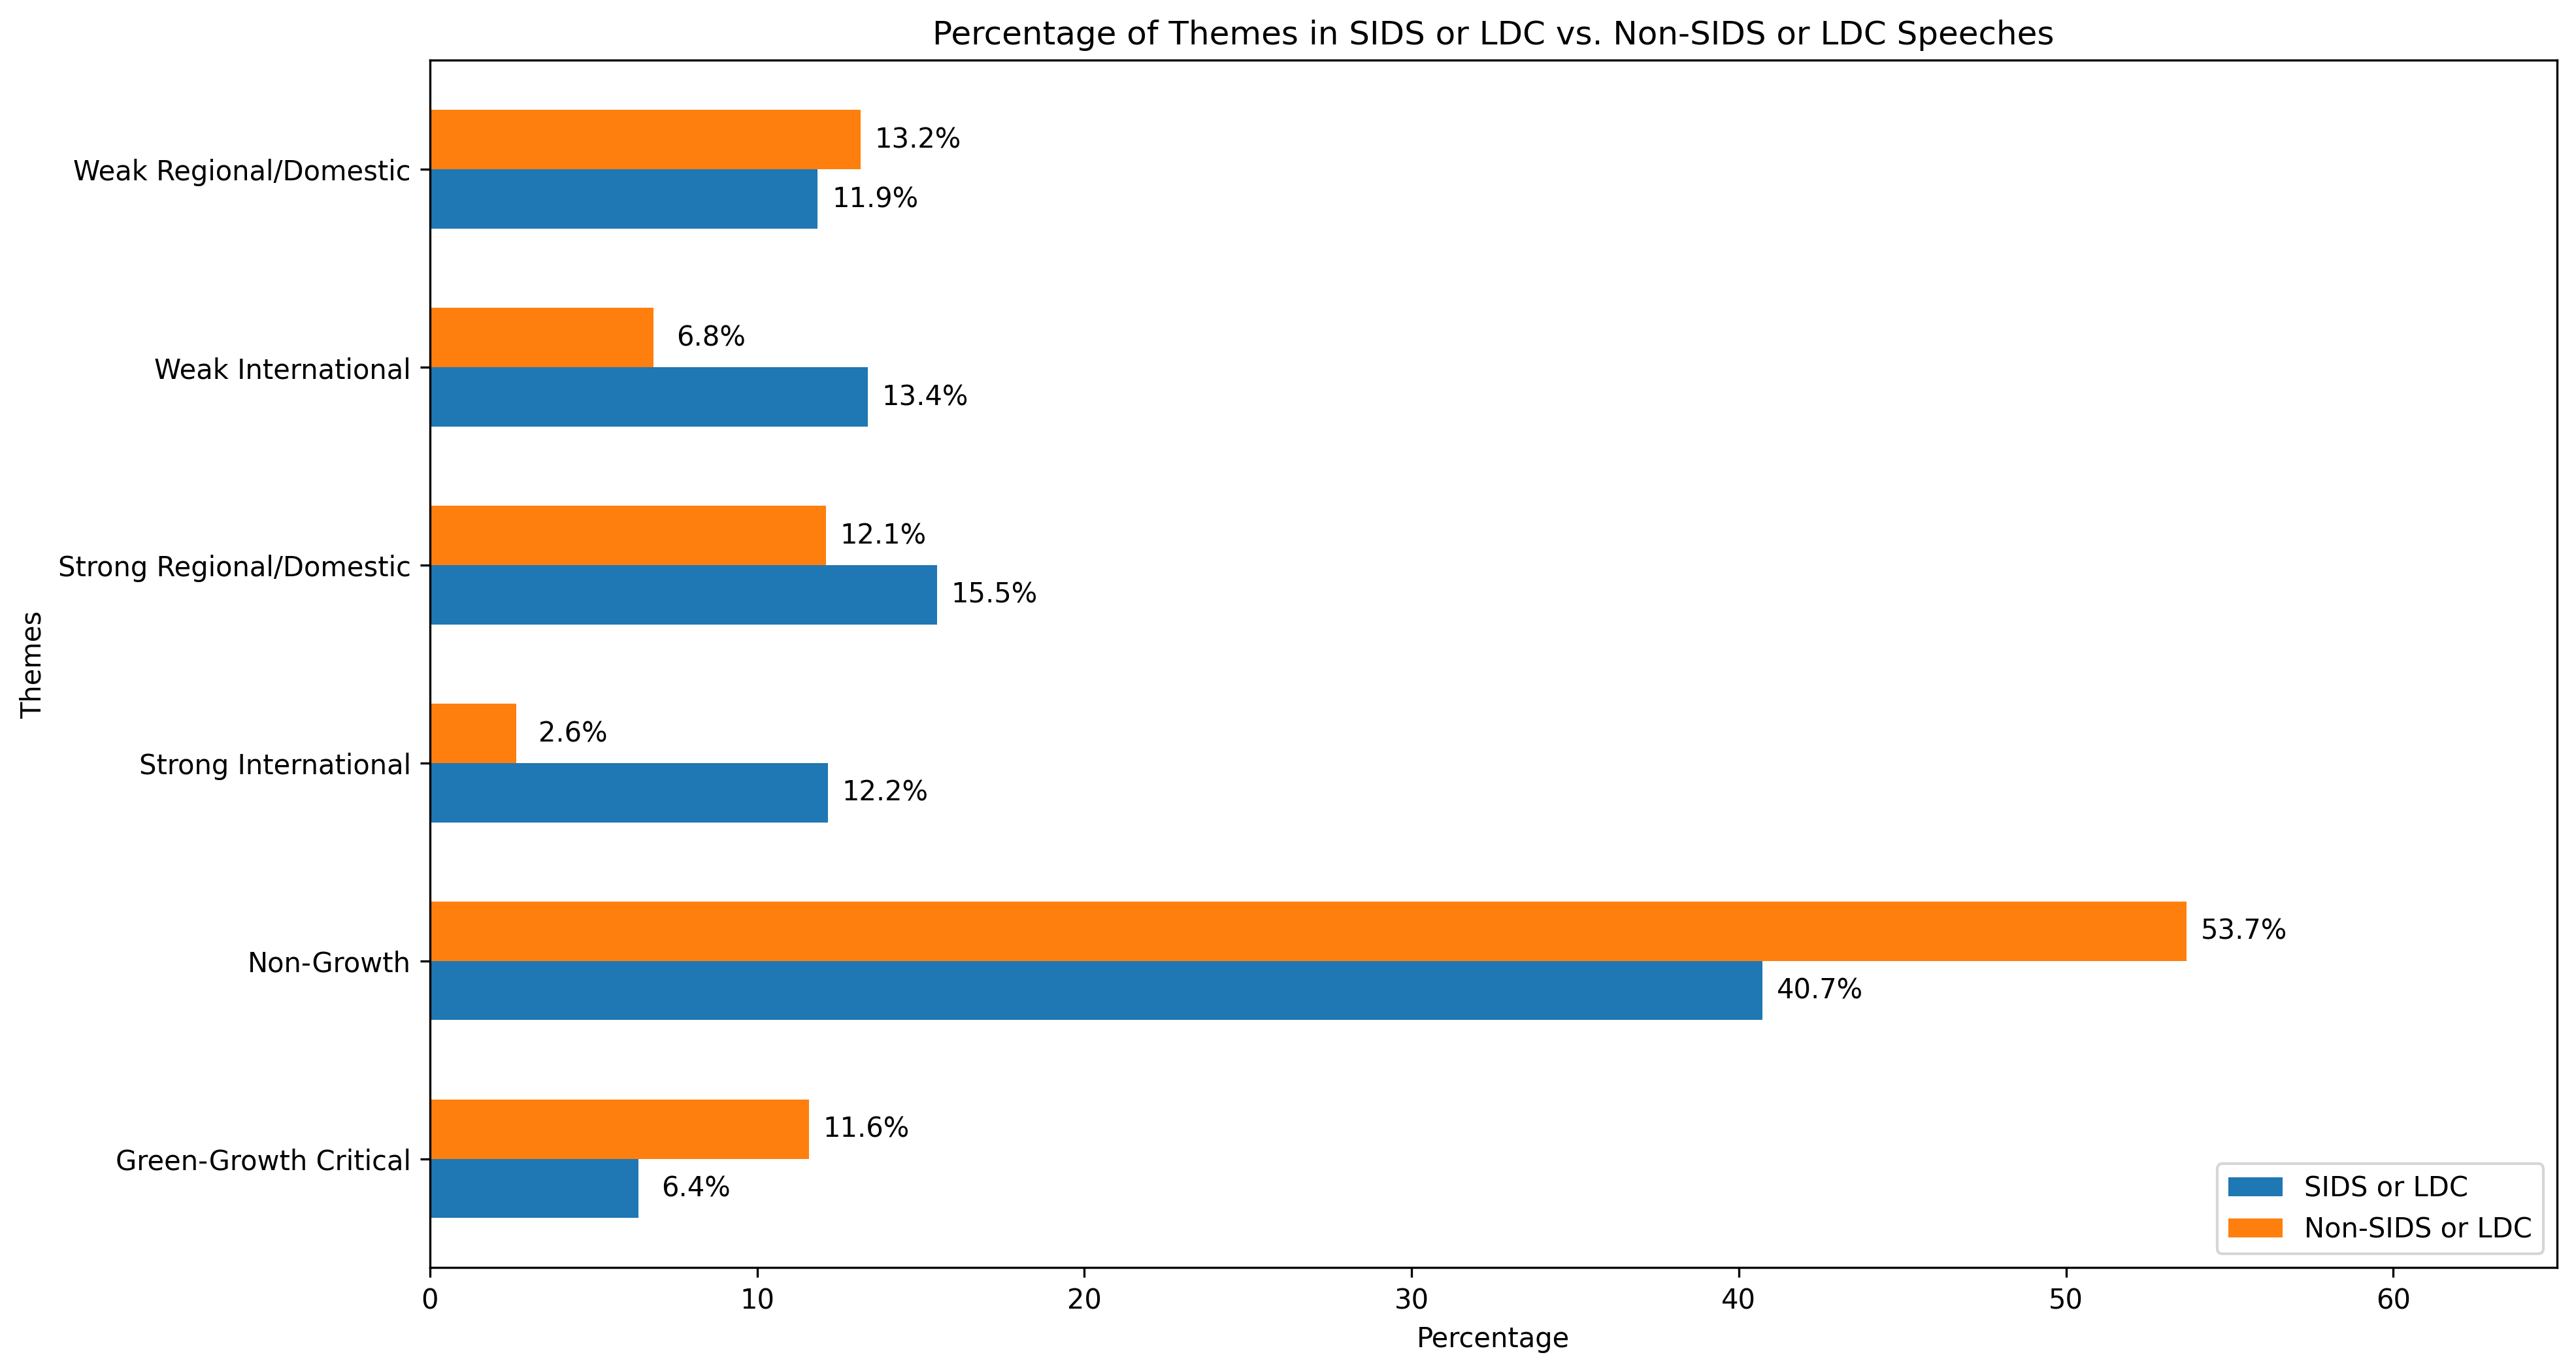

In [42]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
from statsmodels.stats.multitest import multipletests
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('analysisdataset.csv')

# Create a new column 'SIDS_or_LDC' to combine SIDS and LDC
df['SIDS_or_LDC'] = df.apply(lambda row: 'SIDS or LDC' if row['SIDS'] == 'Yes' or row['LDC'] == 'Yes' else 'Non-SIDS or LDC', axis=1)

# Split the Theme_Combined column and create a long-format dataframe
df_themes = df.assign(Theme_Combined=df['Theme_Combined'].str.split()).explode('Theme_Combined')

# Ensure correct mapping of themes to their full names and combine specified themes
theme_mapping = {
    'S_int': 'Strong International',
    'S_reg': 'Strong Regional',
    'S_dom': 'Strong Domestic',
    'W_int': 'Weak International',
    'W_reg': 'Weak Regional',
    'W_dom': 'Weak Domestic',
    'AG': 'Green-Growth Critical',
    'NG': 'Non-Growth'
}

# Map themes
df_themes['Theme_Combined'] = df_themes['Theme_Combined'].map(theme_mapping)

# Combine Strong Regional and Strong Domestic into Strong Regional/Domestic
df_themes['Theme_Combined'] = df_themes['Theme_Combined'].replace({'Strong Regional': 'Strong Regional/Domestic',
                                                                    'Strong Domestic': 'Strong Regional/Domestic',
                                                                    'Weak Regional': 'Weak Regional/Domestic',
                                                                    'Weak Domestic': 'Weak Regional/Domestic'})

# Debug: Print the first few rows of the dataframe after mapping and combining themes
print("Dataframe after mapping and combining themes:")
print(df_themes.head())

# Group by theme and SIDS_or_LDC and count occurrences
grouped_data = df_themes.groupby(['SIDS_or_LDC', 'Theme_Combined']).size().reset_index(name='Count')

# Pivot the data to create a table of counts
pivot_table = grouped_data.pivot(index='Theme_Combined', columns='SIDS_or_LDC', values='Count').fillna(0)

# Perform chi-square tests
chi2_results = []
themes = pivot_table.index

for theme in themes:
    count_sids_ldc = pivot_table.loc[theme, 'SIDS or LDC']
    count_non_sids_ldc = pivot_table.loc[theme, 'Non-SIDS or LDC']
    
    # Create contingency table
    contingency_table = np.array([[count_sids_ldc, pivot_table['SIDS or LDC'].sum() - count_sids_ldc],
                                  [count_non_sids_ldc, pivot_table['Non-SIDS or LDC'].sum() - count_non_sids_ldc]])
    
    # Perform chi-square test
    chi2, p, _, _ = chi2_contingency(contingency_table)
    chi2_results.append([theme, chi2, p])

# Create a DataFrame for results
results_df = pd.DataFrame(chi2_results, columns=['Theme', 'Chi2', 'P-Value'])

# Adjust p-values for multiple comparisons using Bonferroni correction
results_df['Adjusted P-Value'] = multipletests(results_df['P-Value'], method='bonferroni')[1]

# Determine significance
results_df['Significance'] = results_df['Adjusted P-Value'] < 0.05
results_df['Significance'] = results_df['Significance'].map({True: 'Yes', False: 'No'})

# Print the results table
print(results_df.to_string(index=False))

# Plotting the results table
fig, ax = plt.subplots(figsize=(10, 6))
ax.axis('off')

# Create table with wider rows
table = ax.table(cellText=results_df.values, colLabels=results_df.columns, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.auto_set_column_width(col=list(range(len(results_df.columns))))

# Adjust row height
for i in range(len(results_df) + 1):
    table[(i, 0)].set_height(0.05)

# Save the table as a PNG file
plt.savefig('chi_square_results.png', bbox_inches='tight', dpi=300)
plt.show()

# Calculate the total counts for each group
totals = pivot_table.sum(axis=0)
print("Total counts for each group:")
print(totals)

# Calculate the percentages
percentages = pivot_table.div(totals, axis=1) * 100
print("Percentages for each theme by group:")
print(percentages)

# Verify that the total percentages add up to 100 for each group
total_percentages = percentages.sum(axis=0)
print("Total percentages for each group:")
print(total_percentages)

# Plotting percentages horizontally with thinner bars
fig, ax = plt.subplots(figsize=(14, 8), dpi=300)
percentages.plot(kind='barh', ax=ax, width=0.6)

# Adding percentages on top of the bars
for p in ax.patches:
    percentage = p.get_width()
    ax.annotate(f'{percentage:.1f}%', 
                (percentage + 1, p.get_y() + p.get_height() / 2.),  # Move the annotation slightly to the right
                ha='center', va='center', 
                xytext=(9, 0), 
                textcoords='offset points')

# Adjusting the plot
plt.xlim(0, 65)  # Set the x-axis limit to 65%
plt.title('Percentage of Themes in SIDS or LDC vs. Non-SIDS or LDC Speeches')
plt.xlabel('Percentage')
plt.ylabel('Themes')
plt.legend(['SIDS or LDC', 'Non-SIDS or LDC'], loc='lower right')
plt.show()


Dataframe after mapping and combining themes:
   Country Name  Event    Language  Region  annotation_id no GG detected  \
0         Niger  COP26  translated  Africa            349            Yes   
1          Togo  COP28  translated  Africa            601            Yes   
2       Lesotho  COP24          en  Africa             35            Yes   
3     Mauritius  COP24          en  Africa             42            Yes   
4  Sierra Leone  COP24          en  Africa             53            Yes   

  region_specification         Theme_Combined  Year  Cumulative CO2  \
0                  NaN  Green-Growth Critical  2021        0.003010   
1                  NaN  Green-Growth Critical  2022        0.004017   
2                  NaN             Non-Growth  2018        0.003647   
3                  NaN             Non-Growth  2018        0.006598   
4                  NaN             Non-Growth  2018        0.002123   

     GDP_capita  Annual_Capita_CO2_Consumption    HDI HDI_Level  LDC S

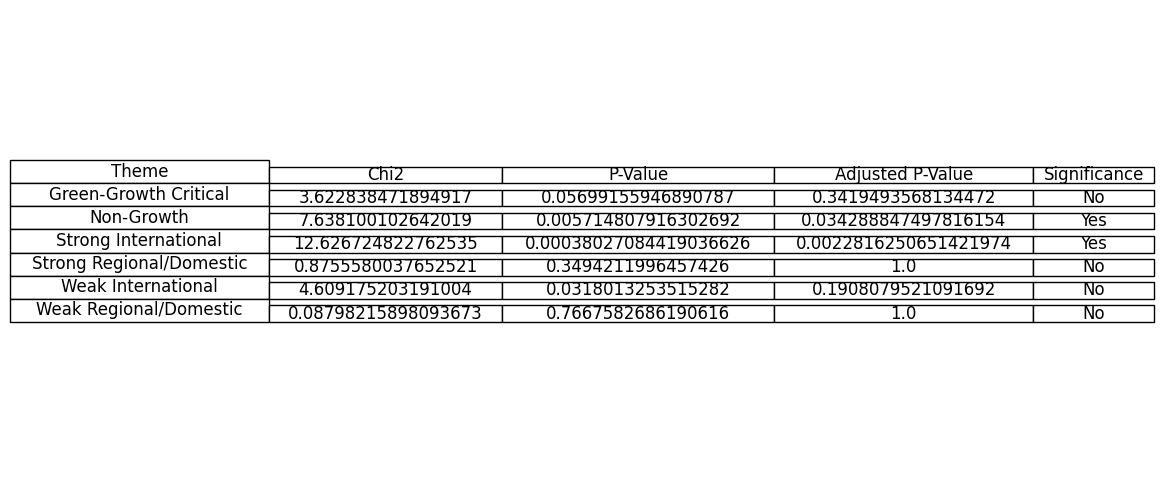

Total counts for each group:
SIDS_or_LDC
Non-SIDS or LDC    329
SIDS or LDC        190
dtype: int64
Percentages for each theme by group:
SIDS_or_LDC               Non-SIDS or LDC  SIDS or LDC
Theme_Combined                                        
Green-Growth Critical            6.382979    11.578947
Non-Growth                      40.729483    53.684211
Strong International            12.158055     2.631579
Strong Regional/Domestic        15.501520    12.105263
Weak International              13.373860     6.842105
Weak Regional/Domestic          11.854103    13.157895
Total percentages for each group:
SIDS_or_LDC
Non-SIDS or LDC    100.0
SIDS or LDC        100.0
dtype: float64


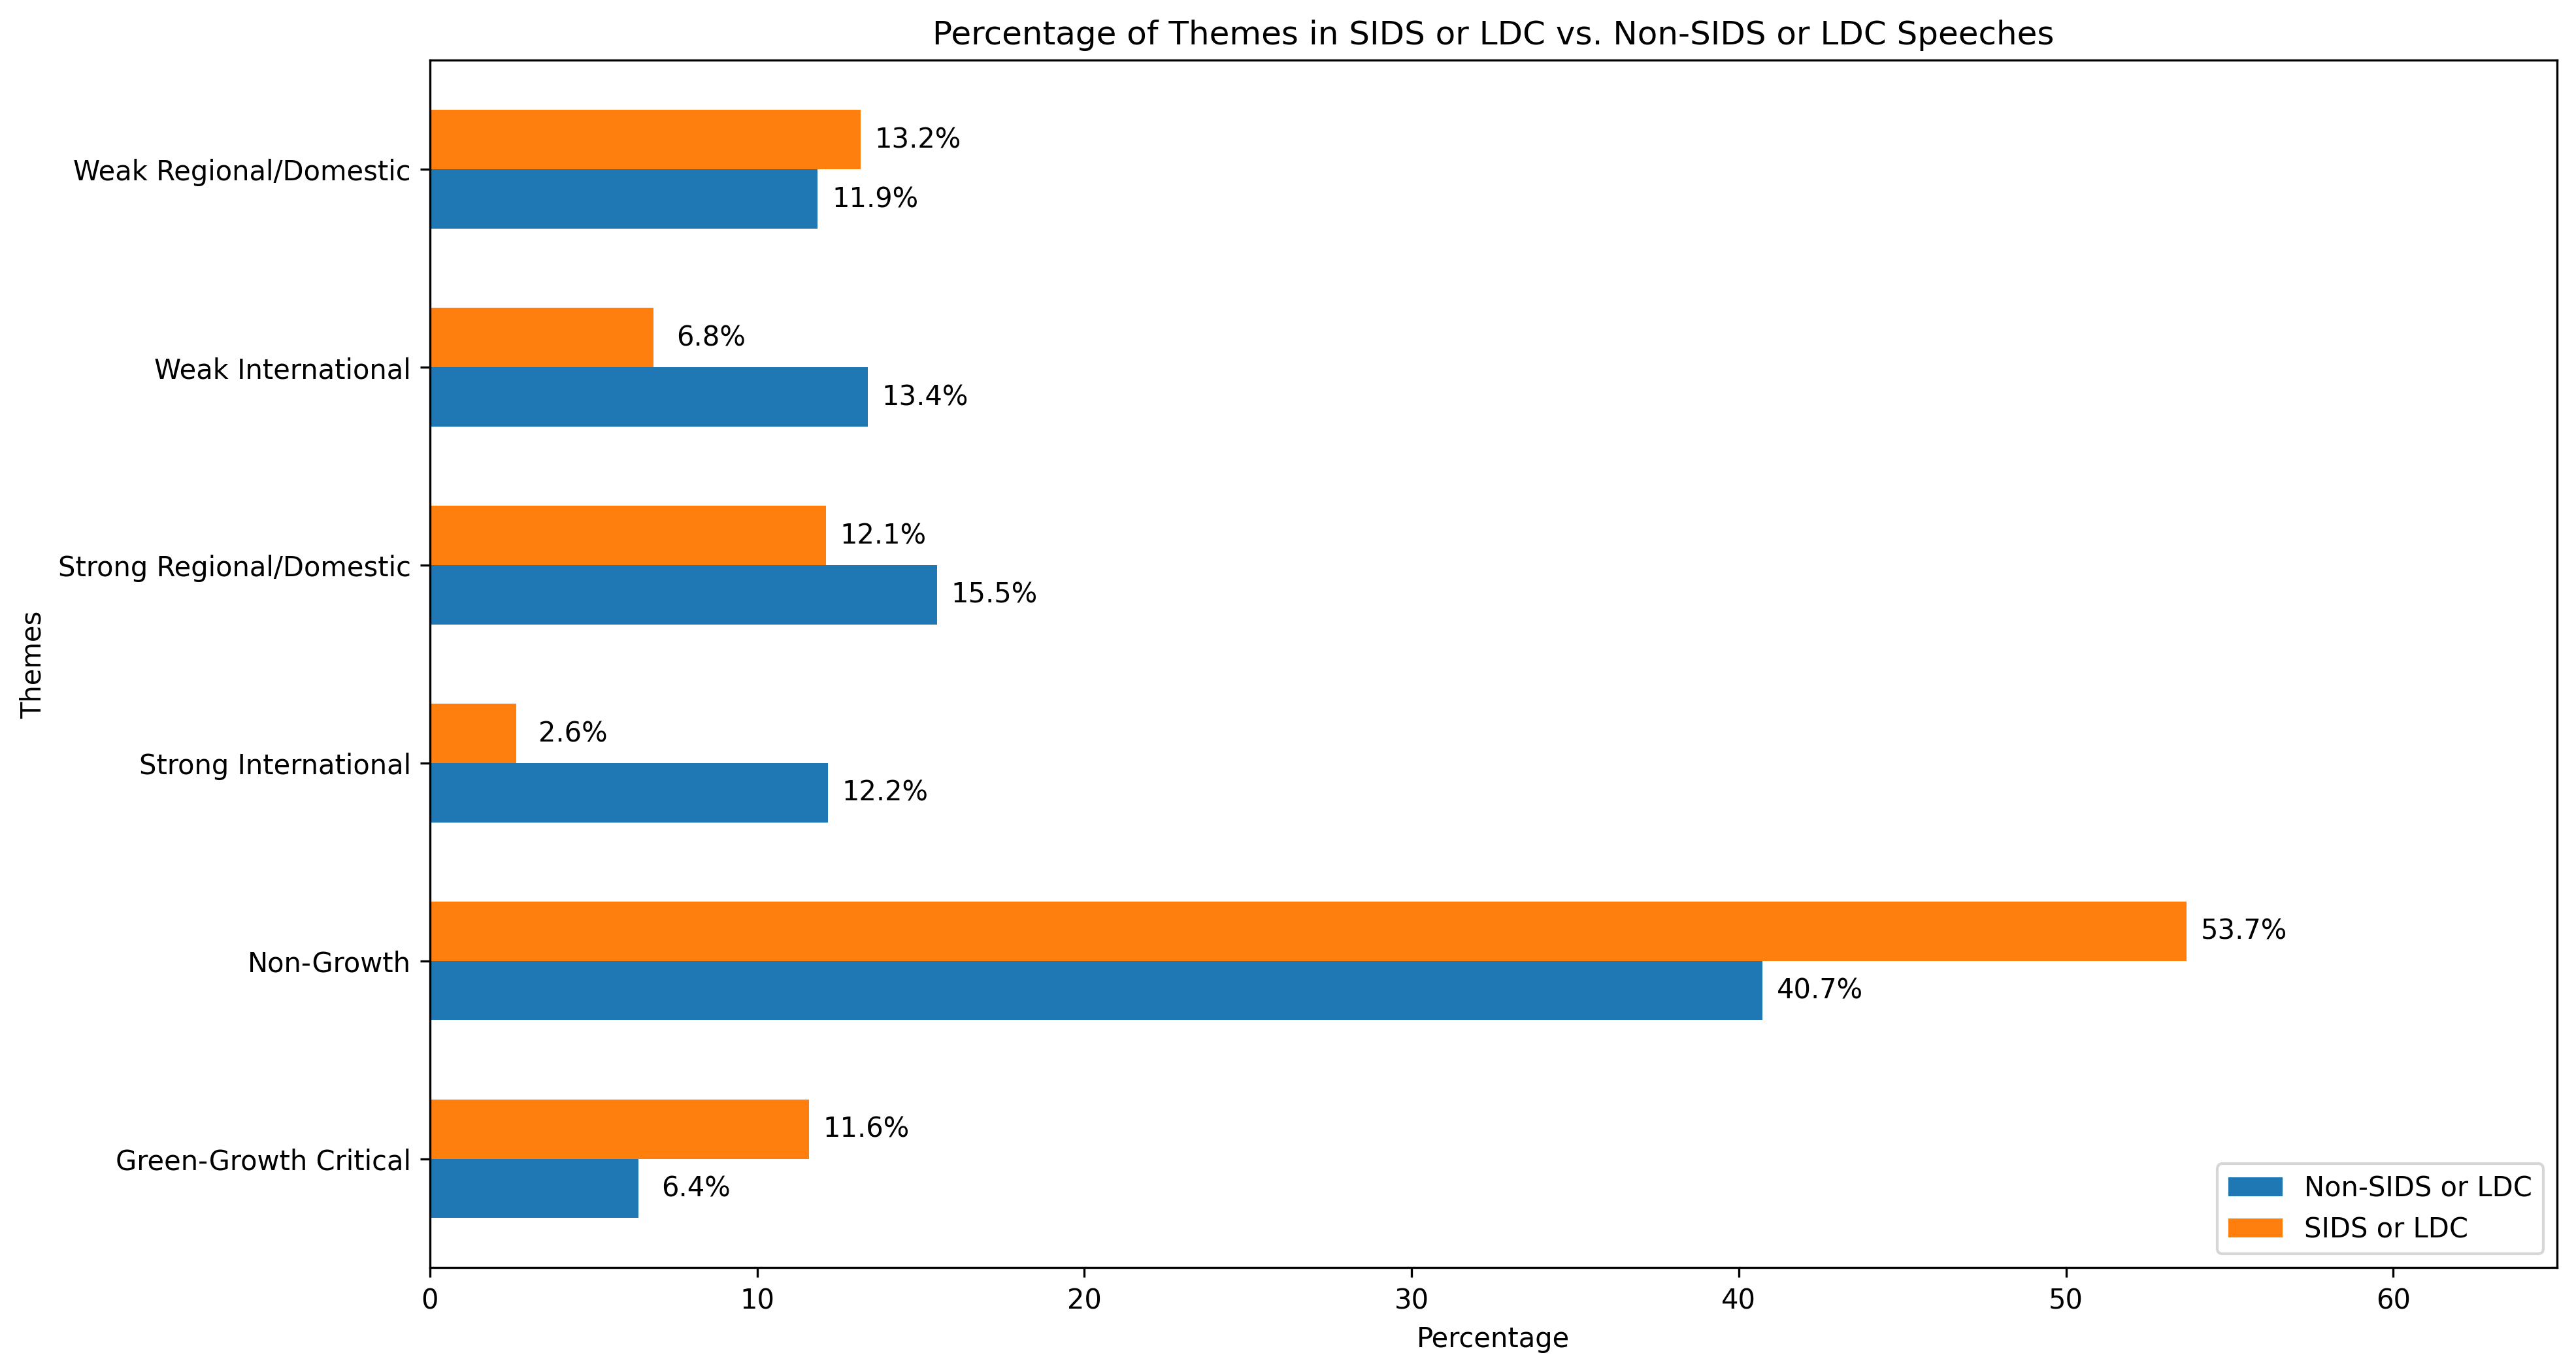

In [2]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
from statsmodels.stats.multitest import multipletests
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('analysisdataset.csv')

# Create a new column 'SIDS_or_LDC' to combine SIDS and LDC
df['SIDS_or_LDC'] = df.apply(lambda row: 'SIDS or LDC' if row['SIDS'] == 'Yes' or row['LDC'] == 'Yes' else 'Non-SIDS or LDC', axis=1)

# Split the Theme_Combined column and create a long-format dataframe
df_themes = df.assign(Theme_Combined=df['Theme_Combined'].str.split()).explode('Theme_Combined')

# Ensure correct mapping of themes to their full names and combine specified themes
theme_mapping = {
    'S_int': 'Strong International',
    'S_reg': 'Strong Regional',
    'S_dom': 'Strong Domestic',
    'W_int': 'Weak International',
    'W_reg': 'Weak Regional',
    'W_dom': 'Weak Domestic',
    'AG': 'Green-Growth Critical',
    'NG': 'Non-Growth'
}

# Map themes
df_themes['Theme_Combined'] = df_themes['Theme_Combined'].map(theme_mapping)

# Combine Strong Regional and Strong Domestic into Strong Regional/Domestic
df_themes['Theme_Combined'] = df_themes['Theme_Combined'].replace({'Strong Regional': 'Strong Regional/Domestic',
                                                                    'Strong Domestic': 'Strong Regional/Domestic',
                                                                    'Weak Regional': 'Weak Regional/Domestic',
                                                                    'Weak Domestic': 'Weak Regional/Domestic'})

# Debug: Print the first few rows of the dataframe after mapping and combining themes
print("Dataframe after mapping and combining themes:")
print(df_themes.head())

# Group by theme and SIDS_or_LDC and count occurrences
grouped_data = df_themes.groupby(['SIDS_or_LDC', 'Theme_Combined']).size().reset_index(name='Count')

# Pivot the data to create a table of counts
pivot_table = grouped_data.pivot(index='Theme_Combined', columns='SIDS_or_LDC', values='Count').fillna(0)

# Perform chi-square tests
chi2_results = []
themes = pivot_table.index

for theme in themes:
    count_sids_ldc = pivot_table.loc[theme, 'SIDS or LDC']
    count_non_sids_ldc = pivot_table.loc[theme, 'Non-SIDS or LDC']
    
    # Create contingency table
    contingency_table = np.array([[count_sids_ldc, pivot_table['SIDS or LDC'].sum() - count_sids_ldc],
                                  [count_non_sids_ldc, pivot_table['Non-SIDS or LDC'].sum() - count_non_sids_ldc]])
    
    # Perform chi-square test
    chi2, p, _, _ = chi2_contingency(contingency_table)
    chi2_results.append([theme, chi2, p])

# Create a DataFrame for results
results_df = pd.DataFrame(chi2_results, columns=['Theme', 'Chi2', 'P-Value'])

# Adjust p-values for multiple comparisons using Bonferroni correction
results_df['Adjusted P-Value'] = multipletests(results_df['P-Value'], method='bonferroni')[1]

# Determine significance
results_df['Significance'] = results_df['Adjusted P-Value'] < 0.05
results_df['Significance'] = results_df['Significance'].map({True: 'Yes', False: 'No'})

# Print the results table
print(results_df.to_string(index=False))

# Plotting the results table
fig, ax = plt.subplots(figsize=(10, 6))
ax.axis('off')

# Create table with wider rows
table = ax.table(cellText=results_df.values, colLabels=results_df.columns, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.auto_set_column_width(col=list(range(len(results_df.columns))))

# Adjust row height
for i in range(len(results_df) + 1):
    table[(i, 0)].set_height(0.05)

# Save the table as a PNG file
plt.savefig('chi_square_results.png', bbox_inches='tight', dpi=300)
plt.show()

# Calculate the total counts for each group
totals = pivot_table.sum(axis=0)
print("Total counts for each group:")
print(totals)

# Calculate the percentages
percentages = pivot_table.div(totals, axis=1) * 100
print("Percentages for each theme by group:")
print(percentages)

# Verify that the total percentages add up to 100 for each group
total_percentages = percentages.sum(axis=0)
print("Total percentages for each group:")
print(total_percentages)

# Plotting percentages horizontally with thinner bars
fig, ax = plt.subplots(figsize=(14, 8), dpi=300)
percentages.plot(kind='barh', ax=ax, width=0.6)

# Adding percentages on top of the bars
for p in ax.patches:
    percentage = p.get_width()
    ax.annotate(f'{percentage:.1f}%', 
                (percentage + 1, p.get_y() + p.get_height() / 2.),  # Move the annotation slightly to the right
                ha='center', va='center', 
                xytext=(9, 0), 
                textcoords='offset points')

# Adjusting the plot
plt.xlim(0, 65)  # Set the x-axis limit to 65%
plt.title('Percentage of Themes in SIDS or LDC vs. Non-SIDS or LDC Speeches')
plt.xlabel('Percentage')
plt.ylabel('Themes')
plt.legend(['Non-SIDS or LDC', 'SIDS or LDC'], loc='lower right')
plt.show()
